# 1. Introduction

The purpose of this report is answer the question of whether there is a relationship between weather and traffic collisions in the city of New York - and if so - to explore the nature of that relationship.

Data pertinent to answering that question will be identified, obtained, collated and analysed using data science tools and techniques.

Linear Regression and Deep Neural Network (DNN) models will ultimately be produced to establish whether it is feasible to accurately predict traffic collision event frequency for given time periods within New York City. This is conducted with a view to informing allocation of emergency service resources in a way that is dynamically responsive to projected changes in the frequency of collision events.

# 2. Methodology

The report is in two parts: data science and data modelling. This is part 1, where the datasets will be obtained, processed and analysed. The purpose of this analysis is twofold: 

1. To identify clear linear correlations between various data features and collision numbers.
2. Based on results of this analysis, to prepare sets of data for export for the linear regression and deep neural network modelling in part 2.

The first task was to obtain the initially required traffic collision and weather datasets from Google BigQuery (Google LLC. 2021), using SQL queries. The methodology by which this was achieved is outlined below. 

Analysis of the datasets, using the R programming environment for statistical analysis (RProject.org, 2021), follows in the 'Analysis' section (4) of this report. 

An initial analysis of the data is undertaken to evaluate which features appear candidates for more detailed examination. The strongest candidate(s) are then selected for further investigation in the 'Focussed Analysis' subsection (4.2).

Results are written up in detail along side the analysis of each feature under investigation. The export of datasets created for both the linear and deep neural network (DNN) regression modelling in part 2 takes place in the 'Export of Result Datasets' section (5).

A brief summary of main findings is listed in the closing 'Conclusions' section (6).

Note that all code blocks below need to be run in the sequential order in which they appear.

# 3. Dataset Preparation

The first task was to obtain the initially required traffic collision and weather datasets from Google BigQuery (Google LLC. 2021), using SQL queries. The methodology by which this is achieved is outlined here in this section. 

CSV files of all data used in this report may be found in the associated Github repository here:

https://github.com/12004727uhi/12004727_DataAnalytics (Github Inc. 2021)

Analysis of the datasets, using the R programming environment for statistical analysis (R Project 2021), follows in the 'Analysis' section of this report. 

An initial analysis of the data is undertaken to evaluate which features appear candidates for more detailed examination. The strongest candidate(s) are then selected for further investigation in the 'Focussed Analysis' subsection.

Results are written up in detail along side the analysis of each feature under investigation. The export of final created datasets for both linear and deep neural network (DNN) regression modelling are exported in the 'Export of Result Datasets' section.

A brief summary of main findings is listed in the closing 'Conclusions' section.


## 3.1 Create NYC Motor Vehicle Collions Dataset

The first query run on BigQuery creates a view counting the number of traffic collisions for every date in the data for New York City, from the new_york_mv_collisions dataset (City of New York 2021), available via Google Cloud Platform BigQuery (Google LLC. 2021). 

This query was as follows:

```
# Create a view for number of collisions for every day in the new_york_mv collisions dataset
CREATE VIEW `uhiproject-324622.assignment_1.collision_data_count`
AS SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
GROUP BY collision_date;
```



## 3.2 Enumerate Days of the Week in Collision Dataset

Next, a view is created showing the collision data above, with the addition of day of the week, as enumerated by the integers 0 to 6 representing Monday to Sunday.

```
# Create a view of collision data with days of the week enumerated.
CREATE VIEW `uhiproject-324622.assignment_1.collision_data_count_final`
AS SELECT FORMAT_DATE("%u", collision_date) AS day, collision_date, NUM_COLLISIONS
FROM `uhiproject-324622.assignment_1.collision_data_count`;
```



## 3.3 Verify Successful View Creation

The range of years covered by the data may be found by examining the first and last rows, as ordered by collision_date.

```
# Select all data, ordering by collision_date, with most recent first
SELECT * FROM `uhiproject-324622.assignment_1.collision_data_count_final` ORDER BY collision_date DESC;
```

The result of this query shows that the range of data comprises the years 2012-2021. The data is incomplete for 2012, as collisions data is only available from 01 July of that year.

The number of records available for 2012 may be confirmed though running the following query:

```
# Find number of records for 2012
SELECT COUNT(*) FROM `uhiproject-324622.assignment_1.collision_data_count_final` WHERE FORMAT_DATE("%Y", collision_date) = "2012";
```

This shows there are 184 records available for 2012, which is correct since that matches the number of days between 01 July and 31 December (inclusive).

Likewise, the number of records in 2021 (to the date this report started to be compiled on 10 September 2021) was queried:

```
# Find number of records for 2021
SELECT COUNT(*) FROM `uhiproject-324622.assignment_1.collision_data_count_final` WHERE FORMAT_DATE("%Y", collision_date) = "2021";
```

The above query shows 253 records for 2021, which is correct for the number of days up to and including 10 September.

## 3.4 Create Weather Data View for 2012 to 2021

Now a view may be created containing the weather data for the period 2012 to 2021, from the noaa_gsod datasets (National Oceanic and Atmospheric Administration 2021), available via Google BigQuery (Google LLC. 2021).

Weather features have been selected that are considered potentially useful for the subsequent data analysis. A brief description of the features selected here is provided later in this document.

```
# Create view for weather data for the New York City region (identifed by 'stn' designation), between 2012 and 2021 inclusive).
CREATE VIEW `uhiproject-324622.assignment_1.weather_2012_to_2021` AS
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE stn='725060' and wban='14756'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, 
sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE stn='725060'
ORDER BY year, mo, da;
```
Now, a table is created that collates the collision and weather data from the previously created views. This is achieved through running the following SQL query:

```
# Create table that collates traffic collision and weather data from views
CREATE TABLE `uhiproject-324622.assignment_1.collated_collision_data`
AS SELECT day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder, NUM_COLLISIONS 
FROM `uhiproject-324622.assignment_1.weather_2012_to_2021` as weather, 
`uhiproject-324622.assignment_1.collision_data_count_final` as collisions
WHERE collisions.collision_date = weather.date
```
The table should then be checked to ensure the expected columns are present:

```
# Verify table of collated data has been successfully created
SELECT * FROM `uhiproject-324622.assignment_1.collated_collision_data`;
```
The headers of the resulting data table refer to the following:

- day: Day of the week of the collisions
- year: Year of these data
- mo: Month of year
- da: Day of month
- collision_date: Date the collisions occurred
- NUM_COLLISIONS: Number of collisions for the date

The weather feature headers in the collated dataset are described in figure 1, below.





**Weather Feature Descriptions**


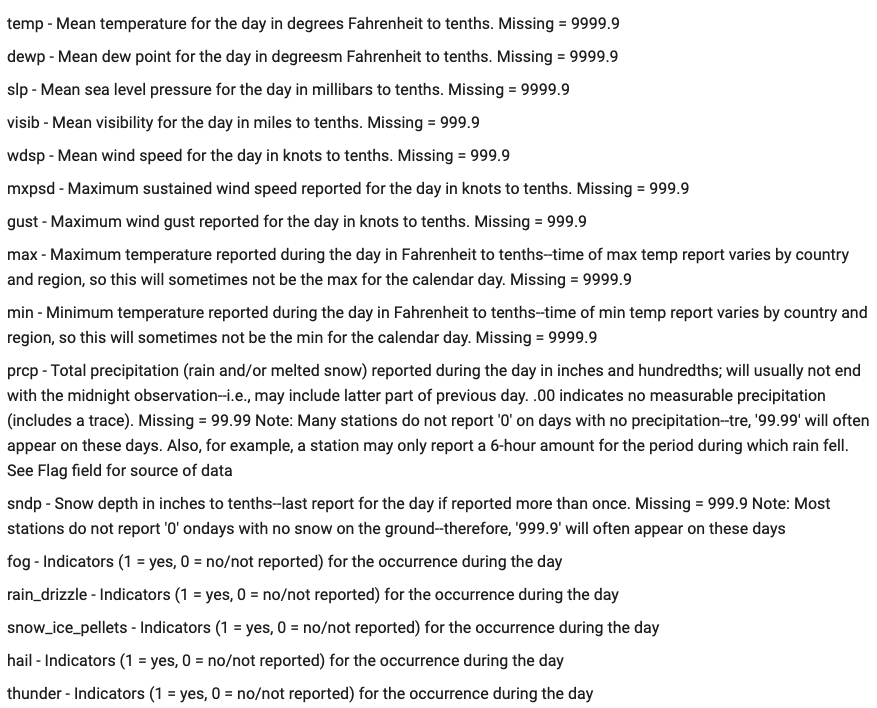


<sub>Figure 1: Weather data information, National Oceanic and Atmospheric Administration via Google Big Query, table `bigquery-public-data:noaa_gsod.gsod2012 (through to .gsod2021) (Google LLC. 2021)`.</sub>

---


## 3.5 Initial Data Cleansing Decision

A decision was made as to whether or not to immediately refine the dataset, once obtained.

Fields such as, for example, dew point, wind gust and sea-level pressure, have artificially high maximum values, which - as described in figure 1 - is a product of these numbers being recorded in lieu of a real figure, when no reading was taken.

Therefore, before proceeding to the next stage of analysis, it would be possible to refine the dataset by omitting these 'fake' values.

Rows containing the following values - denoting missing data - could feasibly be removed, to provide a 'cleaner' dataset:

- dewp: 9999.9
- slp: 9999.9 and 10000 (the MAX figure is 10000, which may be assumed to be a rounding up of the 9999..9 value)
- mxpsd: 999.9
- gust: 999.9

Retaining the 99.99 values for prcp and 999.9 values for sndp is considered essential, as they includes not only _missing values_, but also denote when no rain/melted snow (prcp) or laying snowfall (sndp) was reported on any given day. 

The following query was run, to count how many rows of data would be omitted where one or more of the dewp, slp, mxpsd and gust columns contained these 'missing values'.



```
# Create new table from collated data where 'missing' values removed
SELECT COUNT(*) FROM `uhiproject-324622.assignment_1.collated_collision_data_cleaned_1` WHERE dewp = 9999.9
OR (wdsp = '999.9' OR wdsp = '999.90')
OR (slp = 9999.9 OR slp = 10000)
OR (gust = 999.9);
```

The result of the query (above) produced a count of 1282 rows. That is the number of rows that would be omitted from the 'cleaned' dataset.

In the end, the decision was made to retain all the falsely high 'missing values', as the dataset is relatively small and it was felt the cost of omitting the above rows would vastly exceed any benefit. Missing values may be disregarded in subsequent data analysis, as and when necessary.

## 3.6 Export Data from BigQuery

The dataset generated by the above query was then exported from BigQuery and uploaded to Github as .CSV file, ready for analysis.

The URL to this CSV file (in RAW format) is:

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/collated_collisions_with_weather_data_1.csv

The collated weather and collisions data may now be imported to Colob for analysis, through running the following code blocks. Descriptions of what each block does are contained above the blocks and/or in the code comments.

## 3.7 Load Data to  Google Colab

In [ ]:
# load csv data file
data_collisions <- read.csv("https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/collated_collisions_with_weather_data_1.csv", stringsAsFactors = TRUE)

## 3.8 Verify Successful Import

Examine the first 6 rows of data to confirm a successful import of the .csv file.

In [ ]:
# examine the head
head(data_collisions)

## 3.9 Verify Row Count

Verify the number of rows matches the expected data, which would be the sum of the days for every year:
- 01 July 2012 - 31 December 2012 = 184 
- 01 January 2013 - 31 December 2013 = 365
- 01 January 2014 - 31 December 2014 = 365
- 01 January 2015 - 31 December 2015 = 365
- 01 January 2016 - 31 December 2016 = 366
- 01 January 2017 - 31 December 2017 = 365
- 01 January 2018 - 31 December 2018 = 365
- 01 January 2019 - 31 December 2019 = 365
- 01 January 2020 - 31 December 2020 = 366
- 01 January 2021 - 10 September 2021 = 253

Total expected rows: 3359

In [ ]:
# count the rows
nrow(data_collisions)

The above code counts the number of data rows to ensure the expected number is present. All data seems to have been correctly imported, since 3359 matches the number of days between 01 July 2012 and 10 September 2021.

## 3.10 Examine Imported Data Summary

In [ ]:
# view data summary 
summary(data_collisions)

The artificially high maximum values of fields like dewp are evident, as discussed earlier. The summary contains some interesting information, such as the median and mean values, and quartile figures allowing calculation of interquartile ranges. A cursory examination also highlights clear errors in data recording - such as the maximum value of 1000.000 for 'thunder' (this should be a binary marker - 1 or 0). The mean wind gust speed is recorded as 398.3 Knots (458.01 mph), which is clearly erroneous (this will be considered during the analysis, to follow).

## 3.11 Check for Null Values
Verify there are no null values in the dataset

In [ ]:
# check for null values
apply(data_collisions, 2, function(x) length(which(!is.na(x))))

The lengths of the columns (number of rows) should all be the same if no null values are present. That appears that is the case here - there are 3356 rows, with every column fully populated with data.

## 3.12 Correct Obvious Errors & Adjust Missing Values

For the sake of simplicity in the analysis below, the 99.99 & 999.9 values for prcp and sndp respectively will be assumed to indicate zero rainfall/melted snow and laying snow. The 'missing value' values of 99.99 & 999.9 will therefore be set to 0. 

This is considered an acceptable 'risk' - since without a far deeper analysis using other external datasets, it is not possible to ascertain which of the artificially high values represents missing data or a zero value.

The prcp column is set to zero thus:

First, create a working copy of the dataset (so the original is left unadulterated):

In [ ]:
# create working copy of dataset
cp1_data_collisions <- data_collisions

Now, set the values to zero:

In [ ]:
# set 'missing' prcp values to zero
cp1_data_collisions$prcp[cp1_data_collisions$prcp == 99.990] <- 0

The change is verified here:

In [ ]:
# show summary of prcp
summary(cp1_data_collisions$prcp)

The process is now repeated for sndp:

In [ ]:
# set 'missing' sndp values to zero
cp1_data_collisions$sndp[cp1_data_collisions$sndp == 999.9] <- 0

In [ ]:
# show summary of sndp
summary(cp1_data_collisions$sndp)

There is an obvious error in the maximum value of 1000.000 for the 'thunder' feature, since this is supposed to be a binary value. This has likely been recorded rather than the intended '1'. Therefore, it may be subsituted with 1.

In [ ]:
# set erroneous 1000 thunder value to 1 
cp1_data_collisions$thunder[cp1_data_collisions$thunder == 1000] <- 1

## 3.13 Pearson's R

During the analysis, the correlation coefficient between various data features and number of collisions is often calculated. The calculation method is Pearson's correlation coefficient, or "Pearsons's r". Pearson's r measures whether there is a linear correlation between datas and assigns the strength and direction of any linear relationship a number between 0 and 1, with 1 being a perfect correlation (unrealistically so).

Pearson's r is mathematically defined as the "covariance of two variables divided by the product of their standard deviations" (Wikipedia 2021).

The following scale is used to ascribe a correlation 'strength' articulation to the values and will be used throughout this report. It is derived from a widely cited authority in statistical analysis: J.D. Evans' *Straightforward Statistics for Behavioural Sciences* (Evans 1996).

Positive Linear Relationships
- Very Weak: 0 to 0.19
- Weak: 0.20 to 0.39
- Moderate: 0.40 to 0.59
- Strong: 0.60 to 0.79
- Very Strong: 0.80 to 1.0

Negative Linear Relationships
- Very Weak: 0 to -0.19
- Weak: -0.20 to -0.39
- Moderate: -0.40 to -0.59
- Strong: -0.60 to -0.79
- Very Strong: -0.80 to -1.0

# 4. Analysis

A preliminary analysis of the combined dataset follows. This data includes, for the period covered, all collisions recorded in the New York City dataset, together with the associated weather data.

The various steps of analysis are described below.

## 4.1 Initial Data Analysis

### 4.1.1 Histogram

Histograms provide a nice overview of the data at a glance, allowing observation of any obvious patterns.

Below is a histogram showing the frequency of collisions over the entire dataset.

In [ ]:
# set histogram colour to aardvark purple
colours = c("purple")

In [ ]:
# create histogram of number of collisions per day over entire dataset
hist(c(cp1_data_collisions$NUM_COLLISIONS), breaks=50, col=colours)

The histogram appears to demonstrate two distinct peaks around 300 and 600 collisions per day, separated by a trough. There also seems to be a large jump between around 590 to 600 collisions per day.

The range of the first 'cluster' appears smaller than the second - the distribution is not normal between 'clusters' - but that may be owing to the tendency of histograms to be 'tail heavy'. The second cluster peaks at a 'plateau' at double the frequency of the first, around the brief aforementioned 'spike' at 600 collisions per day.

The shape of the data appears to exhibit quite a high variability; the number of collisions per day does not appear to coalesce stably around a narrow range of values.

### 4.1.2 Scatter Plots

Scatter plots of the various weather features with the number of collisions in the dataset are now created, to see if any patterns are immediately suggested. This will inform which data features are considered candidates for further investigation.

In [ ]:
# load library for scatter plots
library(lattice)

In [ ]:
# plot number of collisions (NUM_COLLISIONS), sea level pressure (slp), dew point (dewp), mean temperature (temp), month (mo), year (year), day of week (day)
splom(~ cp1_data_collisions[,c(1,2,3,6,7,8,22)], groups=NULL, data=cp1_data_collisions,
axis.line.tck=0, axis.text.alpha=0)

In [ ]:
# plot number of collisions (NUM_COLLISION), max wind gust (gust), max sustained wind speed (mxpsd), mean wind speed (wdsp), visibility (visib)
splom(~ cp1_data_collisions[,c(9,10,11,12,22)], groups=NULL, data=cp1_data_collisions,
axis.line.tck=0, axis.text.alpha=0)

In [ ]:
# plot number of collisions (NUM_COLLISIONS), snow depth (sndp), precipitation (prcp), min temperature (min), max temperature (max)
splom(~ cp1_data_collisions[,c(13,14,15,16,22)], groups=NULL, data=cp1_data_collisions,
axis.line.tck=0, axis.text.alpha=0)

In [ ]:
# plot number of collisions (NUM_COLLISIONS), thunder (thunder), hail (hail), snow/ice pellets (snow_ice_pellets), drizzle (rain_drizzle), fog (fog)
splom(~ cp1_data_collisions[,c(17,18,19,20,21,22)], groups=NULL, data=cp1_data_collisions,
axis.line.tck=0, axis.text.alpha=0)

From the above plots, it can be seen that linear relationships may be suggested between the number of collisions and the following features.

Although the number of collisions per year appears to be non-linear, it may be surmised that the Covid-19 pandemic of 2020 and 2021 is responsible for the low collision numbers at the end of the range of years. 'Year' is therefore also included in the list of analysis candidates, below.

* Day of the week (day)
* Mean temperature (temp)
* Maximum temperature (max)
* Minimum temperature (min)
* Visibility (visib)
* Average wind speed (wdsp)
* Precipitation (prcp)
* Snow/Ice Pellets (snow_ice_pellets)
* Thunder (thunder)
* Year (year)

For the purpose of simplicity, and since the data looks similarly plotted, maximum and minimum temperature categories will be omitted, with only the average temperature feature selected for subsequent 'focussed analysis'.

Snow/ice pellets and thunder are also dropped from further investigation at this point, in order to focus deeper analysis on those features felt more likely to exhibit a linear relationship with collisions.

The following features are therefore selected for 'focussed analysis':

1. Day of the week (day)
2. Year (year)
3. Precipitation (prcp)
4. Visibility (visib)
5. Average wind speed (wdsp)
6. Mean temperature (temp)

## 4.2 Focussed Analysis

Here follows a deeper investigation of the five features selected above.

### 4.2.1 Create New Dataset with Additional Geographical Data

In order to conduct a deeper analysis of the data for different geographical areas with New York City, it was necessary to create a new dataset that includes additional spatial information.

The following queries were run on BigQuery to generate such a dataset, which was then exported as a CSV and imported here to Google Colab, similarly to the initial dataset used thus far (in this case, the CSV file was saved to Google Drive prior to transfer to GitHub, owing to a 16,000 row limit that Google applies to local downloads).

First, a view was created that selected collision data for the five boroughs of New York City. Each borough is also a county of New York State, as documented on the City of New York’s “Counties of New York” web page (City of New York 2021a). 

Due to limits of data columns available from the dataset used to establish geographical boundaries - `bigquery-public-data.geo_us_boundaries.counties` (Google LLC. 2021) - this analysis will use and refer to counties, rather than boroughs.

However counties equate to boroughs thus:

- New York County -> Borough of Manhattan
- Queens County -> Borough of Queens
- Kings County -> Borough of Brooklyn
- Bronx County -> Borough of The Bronx
- Richmond County -> Borough of Staten Island

Although the original collisions dataset - `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` (Google LLC. 2021) - does have a field for 'borough' (figure 2), it is evident that there are a lot of gaps in that data; many rows have a `null` value. 

This query counts the total number of collisions recorded in the dataset, yielding 1821138 records:
```
# count total number of collisions in the dataset
SELECT COUNT(*) FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`;
```
The following query counts the number of records containing null values for `borough`, yielding 561973 records (~31% of the total):
```
# count number of collisions with null values in borough field
SELECT COUNT(*) FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
WHERE borough IS NULL;
```
The collisions dataset does also have fields for longitude and latitude, however, as seen in figure 2 (below). The following query for longitude or latitude columns continuing a “null value” establishes that there are fewer gaps in the data where longitude and latitude are not recorded than there were in the data containing null values for the `borough` field - it yields only 213543 records (~12% of the total):
```
# count number of collisions with null values in longitude OR latitude fields
SELECT COUNT(*) FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
WHERE longitude IS NULL OR latitude IS NULL;
```
Therefore, being that missing values for borough (31%) amount to at least twice the number of missing values for the longitude and latitude (~12%), the longitude and latitude values for every collision were used to identify the borough counties for each location, rather than relying on the `borough` field. This was achieved by using a JOIN query with the `bigquery-public-data.geo_us_boundaries.counties` dataset (Google LLC. 2021). 
```
## create view of collision data combined with geographical identification
# get collision data for Bronx County
CREATE VIEW `uhiproject-324622.assignment_1.collision_data_counties`
AS SELECT CAST(timestamp as DATE) as collision_date, 
COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS, 
FORMAT_DATE("%u", CAST(timestamp as DATE)) AS day, counties.lsad_name as county
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
AS collisions JOIN `bigquery-public-data.geo_us_boundaries.counties` counties 
ON ST_CONTAINS(county_geom, ST_GEOGPOINT(collisions.longitude, collisions.latitude)) 
WHERE counties.lsad_name = 'Bronx County'
GROUP BY collision_date, day, county
UNION ALL
# get collision data for Queens County
SELECT CAST(timestamp as DATE) as collision_date, 
COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS, 
FORMAT_DATE("%u", CAST(timestamp as DATE)) 
AS day, counties.lsad_name as county
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
AS collisions JOIN`bigquery-public-data.geo_us_boundaries.counties` counties ON
ST_CONTAINS(county_geom, ST_GEOGPOINT(collisions.longitude, collisions.latitude)) 
WHERE counties.lsad_name = 'Queens County'
GROUP BY collision_date, day, county
UNION ALL
# get collision data for Kings County
SELECT CAST(timestamp as DATE) as collision_date, 
COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS, 
FORMAT_DATE("%u", CAST(timestamp as DATE)) 
AS day, counties.lsad_name as county
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
AS collisions JOIN`bigquery-public-data.geo_us_boundaries.counties` counties ON
ST_CONTAINS(county_geom, ST_GEOGPOINT(collisions.longitude, collisions.latitude)) 
WHERE counties.lsad_name = 'Kings County'
GROUP BY collision_date, day, county
UNION ALL
# get collision data for New York County
SELECT CAST(timestamp as DATE) as collision_date, 
COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS, 
FORMAT_DATE("%u", CAST(timestamp as DATE)) 
AS day, counties.lsad_name as county
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
AS collisions JOIN`bigquery-public-data.geo_us_boundaries.counties` counties ON
ST_CONTAINS(county_geom, ST_GEOGPOINT(collisions.longitude, collisions.latitude)) 
WHERE counties.lsad_name = 'New York County'
GROUP BY collision_date, day, county
UNION ALL
# get collision data for Richmond County
SELECT CAST(timestamp as DATE) as collision_date, 
COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS, 
FORMAT_DATE("%u", CAST(timestamp as DATE)) 
AS day, counties.lsad_name as county
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` 
AS collisions JOIN`bigquery-public-data.geo_us_boundaries.counties` counties ON
ST_CONTAINS(county_geom, ST_GEOGPOINT(collisions.longitude, collisions.latitude)) 
WHERE counties.lsad_name = 'Richmond County'
GROUP BY collision_date, day, county;
```
A collated table of collision data with counties and weather data was then created, like before. Data prior to 11 September 2021 was omitted, as per the previously defined cutoff date for the working data upon which this report is based.
```
# create collated table of collision data with counties + weather data
CREATE TABLE `uhiproject-324622.assignment_1.collated_collision_data_with_counties_and_weather`
AS SELECT day, year, mo, da, collision_date, county, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder, NUM_COLLISIONS 
FROM `uhiproject-324622.assignment_1.weather_2012_to_2021` as weather, 
`uhiproject-324622.assignment_1.collision_data_counties` as collisions
WHERE collisions.collision_date = weather.date AND weather.date < '2021-09-11'
```

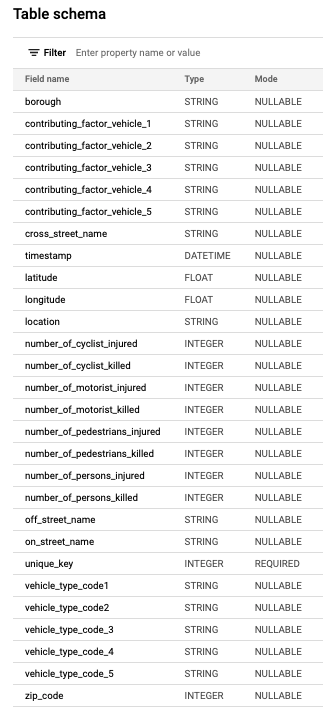

<sub>Figure 2: Table schema for `bigquery-public-data:new_york_mv_collisions.nypd_mv_collisions` via Google Cloud Platform (Google LLC. 2021).</sub>

### 4.2.2 Additional Dataset Preparation
The new dataset with additional geographical data was loaded and prepared for use similarly to the original data above.

The URL to the raw CSV file on GitHub is: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/collated_collision_data_with_counties_and_weather.csv

#### 4.2.2.1 Import Data & Verify

The data was imported from GitHub and verified as follows.



In [ ]:
# load new CSV file with additional spatial data
data_collisions_with_counties <- read.csv("https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/collated_collision_data_with_counties_and_weather.csv", stringsAsFactors = TRUE)

In [ ]:
# count rows of imported CSV
nrow(data_collisions_with_counties)

The number of rows is correct. The original dataset had 3359 rows of data. This is now multiplied by 5, as each date in the range now has data specific to the 5 counties of New York City.

In [ ]:
# check for null values
apply(data_collisions_with_counties, 2, function(x) length(which(!is.na(x))))

All data features in the dataset are populated correctly - there are no null values.

In [ ]:
# show head of imported CSV
head(data_collisions_with_counties)

In [ ]:
# show summary of imported CSV
summary(data_collisions_with_counties)

To establish the difference between records in the original dataset and the dataset with geographical information, the total number of collisions may be summed for both and compared.

In [ ]:
# sum total collisions for original dataset
sum(data_collisions$NUM_COLLISIONS)
# count rows in the origial dataset
nrow(data_collisions)

In [ ]:
# sum total collisions for the dataset with geographical data
sum(data_collisions_with_counties$NUM_COLLISIONS)
# count rows in dataset with geographical data
nrow(data_collisions_with_counties)

It's important to note that, as shown above, this new dataset with additional county information contains fewer collision records than the original dataset (although more rows), owing to the omission of collision records where no geographical data was recorded (null values). 

The total number of collision records is now split between the 5 counties, hence the greater number of rows in the dataset, even though the number of collision records is now fewer.

As can be seen from the sums above, there are 215,523 fewer collision records present in the dataset with geographical (spatial) information.

The dataset with counties may therefore be less representative of the reality for all counties combined than the original dataset.

#### 4.2.2.2 Perform Initial Data Corrections

The steps to set the data's missing values to zero were then repeated for the new dataset with geographical data, as before.

In [ ]:
# create working copy of new dataset
cp1_data_collisions_with_co <- data_collisions_with_counties

In [ ]:
# set missing prcp values to zero
cp1_data_collisions_with_co$prcp[cp1_data_collisions_with_co$prcp == 99.990] <- 0;

In [ ]:
# show summary of prcp to verify change
summary(cp1_data_collisions_with_co$prcp)

In [ ]:
# set missing sndp values to zero (note: strictly unnecessary as sndp not selected for further analysis at this point)
cp1_data_collisions_with_co$sndp[cp1_data_collisions_with_co$sndp == 999.9] <- 0;

In [ ]:
# show summary of sndp to verify change (note: strictly unnecessary as sndp not selected for further analysis at this point)
summary(cp1_data_collisions_with_co$sndp)

In [ ]:
# set erroneous 1000 thunder value to 1 (note: strictly unnecessary as thunder not selected for further analysis at this point)
cp1_data_collisions_with_co$thunder[cp1_data_collisions_with_co$thunder == 1000] <- 1;

In [ ]:
# show summary to verify change
summary(cp1_data_collisions_with_co$thunder)

#### 4.2.2.3 Remove Unrepresentative Years from Data

Before proceeding to create working variables containing the data for each individual county, the yearly data is inspected with a view to establishing the bounds of what is estimated to be a typical set of years.

For example, the Covid-19 pandemic, with associated 'lockdowns' and increasing 'working from home', likely resulted in a significant atypical reduction of road traffic, which would be reflected in the data.

In [ ]:
# plot number of collisions vs year using original dataset (without counties)
plot(cp1_data_collisions$year, cp1_data_collisions$NUM_COLLISIONS, main="Number of Collisions vs Year")

The plot shows that collisions appear to decline significantly in 2020 and 2021.

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions in original dataset vs year
cor(cp1_data_collisions$year, cp1_data_collisions$NUM_COLLISIONS)

There appears to be a moderate negative linear correlation between collisions and year in the range 2012 to 2021. However, this is likely to be unrepresentative of a genuine trend outwith the atypical affect of Covid-19.

In [ ]:
# plot number of collisions vs year using dataset with geographical data (counties)
plot(cp1_data_collisions_with_co$year, cp1_data_collisions_with_co$NUM_COLLISIONS, main="Number of Collisions vs Year")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions in dataset with counties vs year
cor(cp1_data_collisions_with_co$year, cp1_data_collisions_with_co$NUM_COLLISIONS)

From observation of the scatterplot, the dataset with the additional county information appears to demonstrate a far weaker correlation between year and collisions.

The correlation coefficient supports the impression presented by the scatterplot; the correlation is very weak, and indeed negative (a reverse from the original data). This demonstrates very well the relatively large difference the omission of 215,523 records from the original dataset can make.

The plots show that, although a slight reduction of collisions may be observed in 2018 and 2019, this is relatively small and 2 years is not long enough to infer a trend with any degree of confidence. However, there is a large drop in 2019 and 2020, which is consistent with a the Covid-19 effect.

Indeed, the drop in 2019 and 2020 may be responsible for the indication of a moderate negative linear relationship on the original dataset, with a correlation coefficient (Pearson's R) of -0.42.

Despite this apparent correlation, the decision was made to remove the 2020 and 2021 figures from the data prior to further analysis, as the reason for the large reduction of collisions may be inferred as Covid-19 and thus those two years are considered atypical.

Although Covid-19's medium to long term effect on traffic collisions is as yet unknown, it is reasonable to assume that the sharp dip in 2019/20 represents a data anomaly which would distort the analysis of other trends in the data which are the focus of this report.

Therefore, data for 2020 and 2021 is hereby removed, from both the original dataset and the new dataset with spatial information, by the following code.

In [ ]:
# remove data for 2020 from original dataset
cp1_data_collisions <- cp1_data_collisions[which(cp1_data_collisions$year < 2020), ]

In [ ]:
# confirm years have been successfully removed
summary(cp1_data_collisions$year)

In [ ]:
# remove data for 2020 from dataset with additional geographical data (with counties)
cp1_data_collisions_with_co <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year < 2020), ]

In [ ]:
summary(cp1_data_collisions_with_co$year)

Now 2020 and 2021 have been removed from the data, the standard correlation coefficient (Pearson's r) are recalculated, to demonstrate the big difference this makes to the analysis.

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions in original dataset vs year < 2020
cor(cp1_data_collisions$year, cp1_data_collisions$NUM_COLLISIONS)

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions in dataset with counties vs year < 2020
cor(cp1_data_collisions_with_co$year, cp1_data_collisions_with_co$NUM_COLLISIONS)

The recalculation of the standard correlation coefficients (Pearson's r) after 2020 and 2021 have been removed show differences between -0.42 & 0.21 (0.63) for the original dataset, and between -0.14 & 0.14 (0.28) for the dataset with spatial data.

This is significant, especially for the original dataset - any weak negative linear relationship was entirely reversed to a weaker, positive relationship.

Removal of 2019 and 2020 from the datasets is therefore considered justified in that any relationships found hitherto are likely to be more representative of general trends.

### 4.2.3 Analyse Selected Features
In this section the six features selected earlier will be analysed, using both the original dataset and, where appropriate, the dataset containing spatial data.

The analytical steps and processes are shown in this section, together with discussion about the results of the analytical functions performed.

As discussed above, the dataset with spatial data (`cp1_data_collisions_co`) contains fewer data-points (~12% less) than the originally imported dataset, owing to the omission of entries with null values for geographical data. Therefore, the original dataset will be used within the analyses when geographical distinction is not required.

The purpose of the code in each code block is made explicit in the code comments.

This section begins with an analysis of collisions in relation to the year, which also builds upon the work done in the previous section to remove the unrepresentative years from the dataset. The work done in the year analysis also serves to further prepare the data for subsequent analysis of other features.

#### 4.2.3.1 Temporal Trends (year & day_index)

The years 2021 and 2020 have already been removed from all working datasets, due to their unrepresentative nature, as discussed above.

The first relationship to be examined here is purely between the year and the number of collisions. During this process, the data will be split into separate years and 'cleaned', where outlier collision values - and one additional unrepresentative year - will be identified and removed from the data. The data will also be normalised.

The result of this process will produce data for the purpose of being used in all analysis of the other data features to follow subsequently.

Initially, the number of collisions per year over the entire range of data is plotted, both for the original dataset (`cp1_data_collisions`) and the dataset containing the additional county information (`cp1_data_collisions_co`). The correlation coefficients are also calculated.

In [ ]:
# plot number of collisions vs year 2012 to 2019, using original dataset (without counties)
plot(cp1_data_collisions$year, cp1_data_collisions$NUM_COLLISIONS, main="Number of Collisions vs Year")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions in original dataset vs year, 2012 to 2019
cor(cp1_data_collisions$year, cp1_data_collisions$NUM_COLLISIONS)

A weak positive linear relationship between number of collisions and the year appears evident using the original dataset, with a correlation coefficient of (0.21). This represents a slight year-on-year increase.

In [ ]:
# plot number of collisions vs year, 2012 to 2019, using new dataset (with counties)
plot(cp1_data_collisions_with_co$year, cp1_data_collisions_with_co$NUM_COLLISIONS, main="Number of Collisions vs Year")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions in dataset with counties vs year, 2012 to 2019
cor(cp1_data_collisions_with_co$year, cp1_data_collisions_with_co$NUM_COLLISIONS)

The linear correlation is 'very weak' for 2012 to 2019 using the dataset with the counties - the correlation coefficient is only 0.14.

Now, the same is process is repeated with 2012 removed from the dataset. The data is plotted and correlation coefficients for years 2013 to 2019 are calculated. 

Since the data for 2012 is only partial (records only began in July of that year), it was decided that 2012 will henceforth be excluded from the analysis of other features, regardless of how its removal from the data impacts any apparent correlation between year and collisions.

In [ ]:
# remove 2012 from the original dataset
data_collisions_2013_to_2019 <- cp1_data_collisions[which(cp1_data_collisions$year > 2012 ),]

In [ ]:
# remove 2012 from the dataset with counties
data_collisions_2013_to_2019_with_co <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year > 2012 ),]

In [ ]:
# plot number of collisions vs year, 2013 to 2019, using original dataset
plot(data_collisions_2013_to_2019$year, data_collisions_2013_to_2019$NUM_COLLISIONS, main="Number of Collisions vs Year")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions vs year, 2013 - 2019, in original dataset
cor(data_collisions_2013_to_2019$year, data_collisions_2013_to_2019$NUM_COLLISIONS)

In [ ]:
# plot number of collisions vs year, 2013 to 2019, using dataset with counties
plot(data_collisions_2013_to_2019_with_co$year, data_collisions_2013_to_2019_with_co$NUM_COLLISIONS, main="Number of Collisions vs Year")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions vs year, 2013 - 2019, in dataset with counties
cor(data_collisions_2013_to_2019_with_co$year, data_collisions_2013_to_2019_with_co$NUM_COLLISIONS)

Following the removal of 2012, the correlations have now decreased in value, from 0.21 to 0.17 for the original dataset and from 0.14 to 0.13 for the dataset with counties.

The plots show a noteworthy drop between 2018 and 2019. It would be interesting to calculate the correlation coefficient with 2019 removed from the datasets. This is done below.

In [ ]:
# remove 2019 from the original dataset
data_collisions_2013_to_2018 <- data_collisions_2013_to_2019[which(data_collisions_2013_to_2019$year < 2019 ),]

In [ ]:
# remove 2019 from the dataset with counties
data_collisions_2013_to_2018_with_co <- data_collisions_2013_to_2019_with_co[which(data_collisions_2013_to_2019_with_co$year < 2019 ),]

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions vs year, 2013 - 2018, in original dataset
cor(data_collisions_2013_to_2018$year, data_collisions_2013_to_2018$NUM_COLLISIONS)

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions vs year, 2013 - 2018, in dataset with counties
cor(data_collisions_2013_to_2018_with_co$year, data_collisions_2013_to_2018_with_co$NUM_COLLISIONS)

The correlation coefficients suggest a stronger correlation for both datasets if 2019 is removed, with the coefficient for the original data rising significantly to 0.30, and the coefficient for the data with counties rising more modestly to 0.17.

It therefore appears that the correlation between collisions and year is weakest of all when using the dataset for the combined years 2013 - 2019. The strongest linear correlations were exhibited between 2013 and 2018. This is true of both the original dataset and the dataset with the county data.

Here is a tabular summary of the correlation coefficient results.

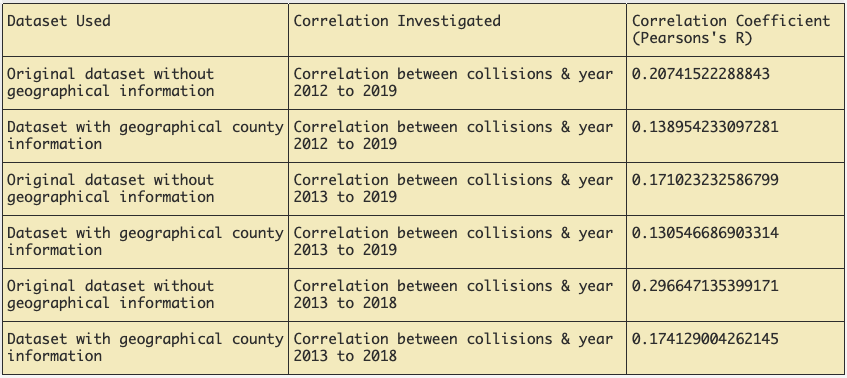

<sub>Table 1 - Summary of correlation coefficient (Pearson's R) results between collisions and year.

The decision was taken to retain 2019 in the datasets for the data cleaning and normalisation processes (below), as it was felt the availability of a greater range of years may be more beneficial - and lead to better predictive accuracy - in terms of identifying seasonal patterns and providing useful insights. 

While 2019 does detract from any linear correlation between the year and collision numbers, its inclusion in the data may be important in terms of identifying patterns for other features, such as the weather data. There appears no immediately logical justification for omitting this year, other than the strengthening of an apparently very weak correlation between year and collision numbers.

However, a cleaned and normalised version of the 2013 to 2018 original dataset will nevertheless be produced and be one of those later exported to inform the linear regression modelling, owing to the 'weak positive linear correlation' with a correlation coefficient of 0.30.

In addition to omitting data for 2020 and 2021 due to Covid, 2012 will also be omitted from the working datasets, owing to its partial nature (i.e. data for the year is incomplete). Although removing that year resulted in a slight decrease in the correlation coefficient for collisions vs year in the examples above, this is considered relatively insignificant. The benefit of removing the partial data is felt to be worth the cost incurred by a decreased range of dataset, in terms of providing cleaner, more uniform data with which to analyse correlations between other features and collisions going forward.

The collision data for the date range 2013 to 2019 is now split into separate subsets of the data for each year, with the additional creation of features representing 'day of year' and a global 'day index'.

The 'day of year' feature allows plots of years overlaying each other to be generated, to visualise common patterns, spread of data, seasonal variations and trends within years. It also allows for outliers in any particular year to be exposed.

The 'day index' feature enables years to be plotted independently and compared along side each other. This allows comparison of the shape of the data across the range of years; identification of outliers; and the determination of whether normalisation or standardisation of scales may be required to provide a better analysis.

The data is then plotted using R's ggplot function.

The same procedure is followed for both the original dataset and the dataset with the additional geographical data. The primary reason for this is to ensure that similarly cleaned and normalised datasets are available for both original data and the data with spatial information, for use during subsequent analysis.

The following code carries out the functions as outlined above.

First, data is split into discrete years.

In [ ]:
## Original dataset (without geographical data)
# get data for 2013
data_collisions_2013 <- cp1_data_collisions[which(cp1_data_collisions$year == 2013), ]
# get data for 2014
data_collisions_2014 <- cp1_data_collisions[which(cp1_data_collisions$year == 2014), ]
# get data for 2015
data_collisions_2015 <- cp1_data_collisions[which(cp1_data_collisions$year == 2015), ]
# get data for 2016
data_collisions_2016 <- cp1_data_collisions[which(cp1_data_collisions$year == 2016), ]
# get data for 2017
data_collisions_2017 <- cp1_data_collisions[which(cp1_data_collisions$year == 2017), ]
# get data for 2018
data_collisions_2018 <- cp1_data_collisions[which(cp1_data_collisions$year == 2018), ]
# get data for 2019
data_collisions_2019 <- cp1_data_collisions[which(cp1_data_collisions$year == 2019), ]
## Dataset with geographical data (with county data)
# get data for 2013
data_collisions_co_2013 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2013), ]
# get data for 2014
data_collisions_co_2014 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2014), ]
# get data for 2015
data_collisions_co_2015 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2015), ]
# get data for 2016
data_collisions_co_2016 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2016), ]
# get data for 2017
data_collisions_co_2017 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2017), ]
# get data for 2018
data_collisions_co_2018 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2018), ]
# get data for 2019
data_collisions_co_2019 <- cp1_data_collisions_with_co[which(cp1_data_collisions_with_co$year == 2019), ]

Day of year and day index variables are now added to the yearly datasets.

In [ ]:
# add day of year and global day index to day_of_year features to data frames
## Original dataset (without geographical data)
### 2013
day_of_year <- 1*seq_len(nrow(data_collisions_2013))
day_index <- 1*seq_len(nrow(data_collisions_2013))
data_collisions_2013 <- cbind(day_index, day_of_year, data_collisions_2013)
### 2014
day_of_year <- 1*seq_len(nrow(data_collisions_2014))
day_index <- 1*seq_len(nrow(data_collisions_2014)) + 365
data_collisions_2014 <- cbind(day_index, day_of_year, data_collisions_2014)
### 2015
day_of_year <- 1*seq_len(nrow(data_collisions_2015))
day_index <- 1*seq_len(nrow(data_collisions_2015)) + 730
data_collisions_2015 <- cbind(day_index, day_of_year, data_collisions_2015)
### 2016
day_of_year <- 1*seq_len(nrow(data_collisions_2016))
day_index <- 1*seq_len(nrow(data_collisions_2016)) + 1095
data_collisions_2016 <- cbind(day_index, day_of_year, data_collisions_2016)
### 2017
day_of_year <- 1*seq_len(nrow(data_collisions_2017))
day_index <- 1*seq_len(nrow(data_collisions_2017)) + 1461
data_collisions_2017 <- cbind(day_index, day_of_year, data_collisions_2017)
### 2018
day_of_year <- 1*seq_len(nrow(data_collisions_2018))
day_index <- 1*seq_len(nrow(data_collisions_2018)) + 1826
data_collisions_2018 <- cbind(day_index, day_of_year, data_collisions_2018)
### 2019
day_of_year <- 1*seq_len(nrow(data_collisions_2019))
day_index <- 1*seq_len(nrow(data_collisions_2019)) + 2191
data_collisions_2019 <- cbind(day_index, day_of_year, data_collisions_2019)
## Dataset with geographical data (reduced dataset, but with county field)
### 2013
day_of_year <- 1*seq_len(nrow(data_collisions_co_2013)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2013)/5)
data_collisions_co_2013 <- cbind(day_index, day_of_year, data_collisions_co_2013)
### 2014
day_of_year <- 1*seq_len(nrow(data_collisions_co_2014)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2014)/5) + 365
data_collisions_co_2014 <- cbind(day_index, day_of_year, data_collisions_co_2014)
### 2015
day_of_year <- 1*seq_len(nrow(data_collisions_co_2015)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2015)/5) + 730
data_collisions_co_2015 <- cbind(day_index, day_of_year, data_collisions_co_2015)
### 2016
day_of_year <- 1*seq_len(nrow(data_collisions_co_2016)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2016)/5) + 1095
data_collisions_co_2016 <- cbind(day_index, day_of_year, data_collisions_co_2016)
### 2017
day_of_year <- 1*seq_len(nrow(data_collisions_co_2017)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2017)/5) + 1461
data_collisions_co_2017 <- cbind(day_index, day_of_year, data_collisions_co_2017)
### 2018
day_of_year <- 1*seq_len(nrow(data_collisions_co_2018)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2018)/5) + 1826
data_collisions_co_2018 <- cbind(day_index, day_of_year, data_collisions_co_2018)
### 2019
day_of_year <- 1*seq_len(nrow(data_collisions_co_2019)/5)
day_index <- 1*seq_len(nrow(data_collisions_co_2019)/5) + 2191
data_collisions_co_2019 <- cbind(day_index, day_of_year, data_collisions_co_2019)

The ggplot library is loaded and the plots for the years are created.

In [ ]:
# load scatter plot library
library(ggplot2)

In [ ]:
# plot all years overlaying each other for original dataset
ggplot() +
geom_point(data=data_collisions_2013, aes(day_of_year, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_2014, aes(day_of_year, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_2015, aes(day_of_year, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_2016, aes(day_of_year, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_2017, aes(day_of_year, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_2018, aes(day_of_year, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_2019, aes(day_of_year, NUM_COLLISIONS, color="2019"))


In [ ]:
# plot all years overlaying each other for dataset with counties
ggplot() +
geom_point(data=data_collisions_co_2013, aes(day_of_year, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_co_2014, aes(day_of_year, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_co_2015, aes(day_of_year, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_co_2016, aes(day_of_year, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_co_2017, aes(day_of_year, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_co_2018, aes(day_of_year, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_co_2019, aes(day_of_year, NUM_COLLISIONS, color="2019"))


The first plot, for the original dataset without spatial data, shows number of collisions per day of the year, for the years 2013 to 2019, overlaid on each other. They demonstrate what appears to be a seasonal pattern, with collision numbers rising in a somewhat linear trajectory from between day 1 and around day 175, after which collisions begin to drop, before beginning to rise again at around day 225.

The pattern is far clearer in the plot for the dataset without spatial data, owing to 35 times fewer data points (7 years * 5 counties). The scales are also different of course, owing to lower numbers of collisions per day being recorded for each individual county, rather than the higher number recorded for all counties combined in the original dataset. Hence the plot for the non-spatial dataset has fewer data points with higher values, allowing the pattern to be visualised here.

The strength of any linear correlations between day of year and collisions - especially between days 1 to 175 - will be tested later. But first, the data will cleaned and normalised, to remove any outlier values and to rescale the collision data to the range [0,1].

Before normalising the data, the years are plotted side by side, to highlight any outlier values and obvious trends in the data.

In [ ]:
# plot years side-by-side for original dataset
ggplot() +
geom_point(data=data_collisions_2013, aes(day_index, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_2014, aes(day_index, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_2015, aes(day_index, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_2016, aes(day_index, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_2017, aes(day_index, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_2018, aes(day_index, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_2019, aes(day_index, NUM_COLLISIONS, color="2019"))

In [ ]:
# plot years side-by-side for dataset with counties
ggplot() +
geom_point(data=data_collisions_co_2013, aes(day_index, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_co_2014, aes(day_index, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_co_2015, aes(day_index, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_co_2016, aes(day_index, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_co_2017, aes(day_index, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_co_2018, aes(day_index, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_co_2019, aes(day_index, NUM_COLLISIONS, color="2019"))

Both plots again demonstrate the apparent positive linear relationship between collisions and the year, with the exception of 2019 where collisions declined. The aforementioned seasonal trend is also evident.

Outliers are now removed to clean up the data.

In [ ]:
# remove outliers max values for original data
data_collisions_2013 <- data_collisions_2013[which(data_collisions_2013$NUM_COLLISIONS <= 900) ,]
data_collisions_2014 <- data_collisions_2014[which(data_collisions_2014$NUM_COLLISIONS <= 900) ,]
data_collisions_2015 <- data_collisions_2015[which(data_collisions_2015$NUM_COLLISIONS <= 900) ,]
data_collisions_2016 <- data_collisions_2016[which(data_collisions_2016$NUM_COLLISIONS <= 900) ,]
data_collisions_2017 <- data_collisions_2017[which(data_collisions_2017$NUM_COLLISIONS <= 900) ,]
data_collisions_2018 <- data_collisions_2018[which(data_collisions_2018$NUM_COLLISIONS <= 900) ,]
data_collisions_2019 <- data_collisions_2019[which(data_collisions_2019$NUM_COLLISIONS <= 900) ,]
# remove outliers max values for data with counties
data_collisions_co_2013 <- data_collisions_co_2013[which(data_collisions_co_2013$NUM_COLLISIONS <= 240) ,]
data_collisions_co_2014 <- data_collisions_co_2014[which(data_collisions_co_2014$NUM_COLLISIONS <= 240) ,]
data_collisions_co_2015 <- data_collisions_co_2015[which(data_collisions_co_2015$NUM_COLLISIONS <= 240) ,]
data_collisions_co_2016 <- data_collisions_co_2016[which(data_collisions_co_2016$NUM_COLLISIONS <= 240) ,]
data_collisions_co_2017 <- data_collisions_co_2017[which(data_collisions_co_2017$NUM_COLLISIONS <= 240) ,]
data_collisions_co_2018 <- data_collisions_co_2018[which(data_collisions_co_2018$NUM_COLLISIONS <= 240) ,]
data_collisions_co_2019 <- data_collisions_co_2019[which(data_collisions_co_2019$NUM_COLLISIONS <= 240) ,]
# remove outliers min values for original data
data_collisions_2013 <- data_collisions_2013[which(data_collisions_2013$NUM_COLLISIONS >= 325) ,]
data_collisions_2014 <- data_collisions_2014[which(data_collisions_2014$NUM_COLLISIONS >= 325) ,]
data_collisions_2015 <- data_collisions_2015[which(data_collisions_2015$NUM_COLLISIONS >= 325) ,]
data_collisions_2016 <- data_collisions_2016[which(data_collisions_2016$NUM_COLLISIONS >= 325) ,]
data_collisions_2017 <- data_collisions_2017[which(data_collisions_2017$NUM_COLLISIONS >= 325) ,]
data_collisions_2018 <- data_collisions_2018[which(data_collisions_2018$NUM_COLLISIONS >= 325) ,]
data_collisions_2019 <- data_collisions_2019[which(data_collisions_2019$NUM_COLLISIONS >= 325) ,]
# remove outliers min values for data with counties
data_collisions_co_2013 <- data_collisions_co_2013[which(data_collisions_co_2013$NUM_COLLISIONS >= 3) ,]
data_collisions_co_2014 <- data_collisions_co_2014[which(data_collisions_co_2014$NUM_COLLISIONS >= 3) ,]
data_collisions_co_2015 <- data_collisions_co_2015[which(data_collisions_co_2015$NUM_COLLISIONS >= 3) ,]
data_collisions_co_2016 <- data_collisions_co_2016[which(data_collisions_co_2016$NUM_COLLISIONS >= 3) ,]
data_collisions_co_2017 <- data_collisions_co_2017[which(data_collisions_co_2017$NUM_COLLISIONS >= 3) ,]
data_collisions_co_2018 <- data_collisions_co_2018[which(data_collisions_co_2018$NUM_COLLISIONS >= 3) ,]
data_collisions_co_2019 <- data_collisions_co_2019[which(data_collisions_co_2019$NUM_COLLISIONS >= 3) ,]

##### 4.2.3.1.1 Normalisation of Data
The data is then normalised, by rescaling the number of collisions between 0 and 1. This scaling will ensure a common, direct comparison between the datasets, whilst retaining differences within their ranges. The normalisation function is shown in code, below, and the subsequent code proceeds to normalise the collision data (see code comments for precisely what each block is doing).

In [ ]:
# normalisation function defined
normalise <- function(x) {
    (x - min(x)) / (max(x) - min(x))
  }

In [ ]:
# create new data variable for normalised data (with original dataset)
data_collisions_2013_norm <- data_collisions_2013

In [ ]:
# normalise the NUM_COLLISIONS feature (column) of the data
data_collisions_2013_norm$NUM_COLLISIONS <- normalise(data_collisions_2013_norm$NUM_COLLISIONS)

In [ ]:
# view summary to confirm normalisation was successful
summary(data_collisions_2013_norm$NUM_COLLISIONS)

In [ ]:
# repeat the above normalisation process (above) for 2014 - 2019 (original dataset)
data_collisions_2014_norm <- data_collisions_2014
data_collisions_2015_norm <- data_collisions_2015
data_collisions_2016_norm <- data_collisions_2016
data_collisions_2017_norm <- data_collisions_2017
data_collisions_2018_norm <- data_collisions_2018
data_collisions_2019_norm <- data_collisions_2019
data_collisions_2014_norm$NUM_COLLISIONS <- normalise(data_collisions_2014_norm$NUM_COLLISIONS)
data_collisions_2015_norm$NUM_COLLISIONS <- normalise(data_collisions_2015_norm$NUM_COLLISIONS)
data_collisions_2016_norm$NUM_COLLISIONS <- normalise(data_collisions_2016_norm$NUM_COLLISIONS)
data_collisions_2017_norm$NUM_COLLISIONS <- normalise(data_collisions_2017_norm$NUM_COLLISIONS)
data_collisions_2018_norm$NUM_COLLISIONS <- normalise(data_collisions_2018_norm$NUM_COLLISIONS)
data_collisions_2019_norm$NUM_COLLISIONS <- normalise(data_collisions_2019_norm$NUM_COLLISIONS)
# repeat the above normalisation process (above) for 2013 - 2019 (dataset with counties)
data_collisions_co_2013_norm <- data_collisions_co_2013
data_collisions_co_2014_norm <- data_collisions_co_2014
data_collisions_co_2015_norm <- data_collisions_co_2015
data_collisions_co_2016_norm <- data_collisions_co_2016
data_collisions_co_2017_norm <- data_collisions_co_2017
data_collisions_co_2018_norm <- data_collisions_co_2018
data_collisions_co_2019_norm <- data_collisions_co_2019
data_collisions_co_2013_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2013_norm$NUM_COLLISIONS)
data_collisions_co_2014_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2014_norm$NUM_COLLISIONS)
data_collisions_co_2015_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2015_norm$NUM_COLLISIONS)
data_collisions_co_2016_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2016_norm$NUM_COLLISIONS)
data_collisions_co_2017_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2017_norm$NUM_COLLISIONS)
data_collisions_co_2018_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2018_norm$NUM_COLLISIONS)
data_collisions_co_2019_norm$NUM_COLLISIONS <- normalise(data_collisions_co_2019_norm$NUM_COLLISIONS)

In [ ]:
# create the combined yearly original data for future reference, now cleaned & normalised, 2013-2019
data_collisions_2013_to_2019_norm <- rbind(data_collisions_2013_norm, data_collisions_2014_norm, data_collisions_2015_norm, 
data_collisions_2016_norm, data_collisions_2017_norm, data_collisions_2018_norm, 
data_collisions_2019_norm)

In [ ]:
# verify year range of original data 2013-2019, cleaned & normalised
summary(data_collisions_2013_to_2019_norm$year)

In [ ]:
# create the combined yearly original data for future export, now cleaned & normalised, 2013-2018
data_collisions_2013_to_2018_norm <- rbind(data_collisions_2013_norm, data_collisions_2014_norm, data_collisions_2015_norm, 
data_collisions_2016_norm, data_collisions_2017_norm, data_collisions_2018_norm)

In [ ]:
# verify year range of original data 2013-2019, cleaned & normalised
summary(data_collisions_2013_to_2018_norm$year)

In [ ]:
# recreate the combined yearly data with counties, for future reference, now cleaned & normalised, 2013-2019
data_collisions_co_2013_to_2019_norm <- rbind(data_collisions_co_2013_norm, data_collisions_co_2014_norm, data_collisions_co_2015_norm, 
data_collisions_co_2016_norm, data_collisions_co_2017_norm, data_collisions_co_2018_norm, 
data_collisions_co_2019_norm)

In [ ]:
# verify year range of data with counties, 2013-2019, cleaned & normalised
summary(data_collisions_co_2013_to_2019_norm$year)

The collisions for each year are again plotted - this time using the cleaned and normalised data.

In [ ]:
# plot years overlaying each other with normalised data (original dataset)
ggplot() +
geom_point(data=data_collisions_2013_norm, aes(day_of_year, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_2014_norm, aes(day_of_year, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_2015_norm, aes(day_of_year, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_2016_norm, aes(day_of_year, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_2017_norm, aes(day_of_year, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_2018_norm, aes(day_of_year, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_2019_norm, aes(day_of_year, NUM_COLLISIONS, color="2019"))

In [ ]:
# plot years overlaying each other with normalised data (dataset with counties)
ggplot() +
geom_point(data=data_collisions_co_2013_norm, aes(day_of_year, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_co_2014_norm, aes(day_of_year, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_co_2015_norm, aes(day_of_year, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_co_2016_norm, aes(day_of_year, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_co_2017_norm, aes(day_of_year, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_co_2018_norm, aes(day_of_year, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_co_2019_norm, aes(day_of_year, NUM_COLLISIONS, color="2019"))

The seasonal trend still appears evident, although perhaps is not so immediately obvious using the normalised scaling.

The years are now plotted side-by-side once again.

In [ ]:
# plot years side-by-side with normalised data (original dataset)
ggplot() +
geom_point(data=data_collisions_2013_norm, aes(day_index, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_2014_norm, aes(day_index, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_2015_norm, aes(day_index, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_2016_norm, aes(day_index, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_2017_norm, aes(day_index, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_2018_norm, aes(day_index, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_2019_norm, aes(day_index, NUM_COLLISIONS, color="2019"))

In [ ]:
# plot years side-by-side with normalised data (dataset with counties)
ggplot() +
geom_point(data=data_collisions_co_2013_norm, aes(day_index, NUM_COLLISIONS, color="2013")) +
geom_point(data=data_collisions_co_2014_norm, aes(day_index, NUM_COLLISIONS, color="2014")) +
geom_point(data=data_collisions_co_2015_norm, aes(day_index, NUM_COLLISIONS, color="2015")) +
geom_point(data=data_collisions_co_2016_norm, aes(day_index, NUM_COLLISIONS, color="2016")) +
geom_point(data=data_collisions_co_2017_norm, aes(day_index, NUM_COLLISIONS, color="2017")) +
geom_point(data=data_collisions_co_2018_norm, aes(day_index, NUM_COLLISIONS, color="2018")) +
geom_point(data=data_collisions_co_2019_norm, aes(day_index, NUM_COLLISIONS, color="2019"))

In this case, normalisation of the scales has made correlations and patterns more difficult to visually detect by glancing at the plots.

Calculation of the correlation coefficients are now repeated, to compare against previous values that used the data without normalisation and removal of outliers.

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions vs year, 2013 - 2019, in original dataset, cleaned & normalised
cor(data_collisions_2013_to_2019_norm$year, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for number of collisions vs year, 2013 - 2019, in original dataset, cleaned & normalised
cor(data_collisions_co_2013_to_2019_norm$year, data_collisions_co_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

It can be seen that, for the original dataset (without spatial data), the correlation between collisions and the data for all years ranging 2013 to 2019 is about the same for both the unprocessed and processed data: 0.17.

However, there is a tiny difference for the dataset with counties. The non-processed correlation was 0.13, whereas the processed value had dropped to 0.09. The difference may be artefact of the smaller number of collision events recorded here (null values in the longitude and latitude columns were were excluded).

The difference in correlation coefficient between processed values for the original dataset and the spatial dataset, amounts to 0.08, with the original dataset having the stronger case for a positive linear relationship between year and collisions - although 'very weak'.

Correlation between collisions and day of year is now tested; first all days of the combined 2013 to 2019 dataset, then just between days 1 and 175.

The original non-spatial dataset will be used henceforth in every analysis as default, unless a geographical relationship is being investigated, due to its larger sample size.

First, collisions vs day of year is plotted and a correlation coefficient calculated. 

In [ ]:
# plot day of year vs collisions (2013-2019 combined)
plot(data_collisions_2013_to_2019_norm$day_of_year, data_collisions_2013_to_2019_norm$NUM_COLLISIONS)

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2013-2019 (combined), all days
cor(data_collisions_2013_to_2019_norm$day_of_year, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient of 0.17 for day of year and collisions is, at 0.17, very weak. 

Now, only the first 175 days of every year in the 2013-2019 dataset are extracted and plotted, and a correlation coefficient calculated.

Note that for each year there may now be several days missing from the records, owing to outliers already having been removed from the data.

In [ ]:
# create variable for day 1 - 175 (original data)
first_175 <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176),]

In [ ]:
# summary for day 1 - 175 (original data) to check correct data selection
summary(first_175$day_of_year)

In [ ]:
# verify that for each year, there are around 175 records (+- the previously removed outlier records)
## 2013 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2013'),])
## 2014 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2014'),])
## 2015 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2015'),])
## 2016 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2016'),])
## 2017 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2017'),])
## 2018 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2018'),])
## 2019 
nrow(data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176 & data_collisions_2013_to_2019_norm$year == '2019'),])

All years have the correct number of records - within 3 days of 175 is to be expected, given the previous removal of outlier values.

In [ ]:
# plot day 1 - 175 vs collisions (2013-2019 combined)
plot(first_175$day_of_year, first_175$NUM_COLLISIONS)

The plot appears to suggest a positive linear correlation.

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2013-2019 (combined), days 1 - 175
cor(first_175$day_of_year, first_175$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient of 0.38 for collisions vs day of year 1 to 175 is, although still strictly defined as 'weak', very close to 'moderate'. It is significantly higher than the coefficient for every day of the year - over twice as high in fact - which suggests a seasonal pattern.

To see if the correlation between collisions and days of year (and apparent 'seasons' within a year) may be further improved, correlation coefficients are now calculated for each full year individually, between (2013 to 2019), and then for the first 175 days over the same range of years. 

The results are tabulated following the calculations.


In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2013
cor(data_collisions_2013_norm$day_of_year, data_collisions_2013_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2014
cor(data_collisions_2014_norm$day_of_year, data_collisions_2014_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2015
cor(data_collisions_2015_norm$day_of_year, data_collisions_2015_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2016
cor(data_collisions_2016_norm$day_of_year, data_collisions_2016_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2017
cor(data_collisions_2017_norm$day_of_year, data_collisions_2017_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2018
cor(data_collisions_2018_norm$day_of_year, data_collisions_2018_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for 2019
cor(data_collisions_2019_norm$day_of_year, data_collisions_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2013, days 1 - 175
first_175_2013 <- data_collisions_2013_norm[which(data_collisions_2013_norm$day_of_year < 176),]
cor(first_175_2013$day_of_year, first_175_2013$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2014, days 1 - 175
first_175_2014 <- data_collisions_2014_norm[which(data_collisions_2014_norm$day_of_year < 176),]
cor(first_175_2014$day_of_year, first_175_2014$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2015, days 1 - 175
first_175_2015 <- data_collisions_2015_norm[which(data_collisions_2015_norm$day_of_year < 176),]
cor(first_175_2015$day_of_year, first_175_2015$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2016, days 1 - 175
first_175_2016 <- data_collisions_2016_norm[which(data_collisions_2016_norm$day_of_year < 176),]
cor(first_175_2016$day_of_year, first_175_2016$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2017, days 1 - 175
first_175_2017 <- data_collisions_2017_norm[which(data_collisions_2017_norm$day_of_year < 176),]
cor(first_175_2017$day_of_year, first_175_2017$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2018, days 1 - 175
first_175_2018 <- data_collisions_2018_norm[which(data_collisions_2018_norm$day_of_year < 176),]
cor(first_175_2018$day_of_year, first_175_2018$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions vs day of the year, for 2019, days 1 - 175
first_175_2019 <- data_collisions_2019_norm[which(data_collisions_2019_norm$day_of_year < 176),]
cor(first_175_2019$day_of_year, first_175_2019$NUM_COLLISIONS, use="complete.obs", method="pearson")

Here is the table of results.

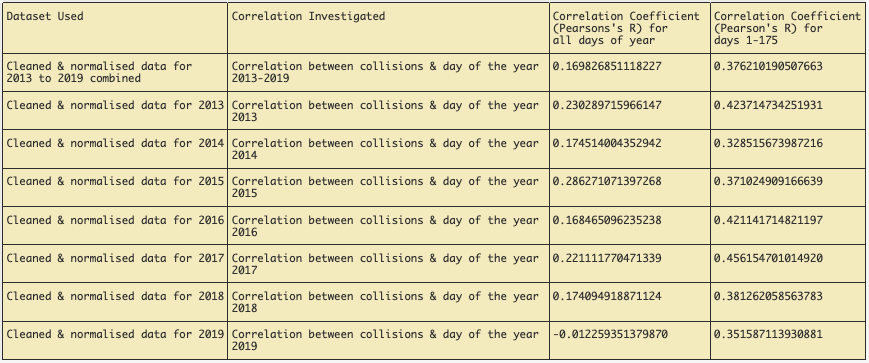

<sub>Table 2 - Summary of correlation coefficient (Pearson's R) results between collisions and day of year.

As shown in table 2, a seasonal variation seems clearly evident, with days 1 to 175 having a far stronger correlation coefficient than the entire year.

Years 2013, 2016 and 2017 show the highest correlation coefficients.

It is interesting to note that while the coefficient for the entirety of 2019 was a very low -0.01 (a negative indication), which was certainly an outlier when compared to the range of the other years, the first 175 days of that year showed a coefficient very much in keeping with the range of other years. This suggests that it was day 176 to 365 of 2019 that caused that year to end up outwith the expected range of the other previous years.

Another interesting observation is that when looking at entire years as opposed to the first 175 days, 2016 is replaced by 2015 in the top 3 strongest correlation index.

Data for the first 175 days of the three years with the highest correlation coefficients are now combined, with the intention of establishing the difference between these as grouped together, and the overall correlation for the first 175 days for all years combined (0.38).

In [ ]:
# combine 2013, 2016 and 2017 into one variable
data_collisions_13_16_17_norm <- rbind(data_collisions_2013_norm, data_collisions_2016_norm, data_collisions_2017_norm)

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for combined years 2013, 2016, 2017, all days
cor(data_collisions_13_16_17_norm$day_of_year, data_collisions_13_16_17_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) between day of year and collisions for combined years 2013, 2016, 2017, days 1 - 175.
first_175_13_16_17 <- data_collisions_13_16_17_norm[which(data_collisions_13_16_17_norm$day_of_year < 176),]
cor(first_175_13_16_17$day_of_year, first_175_13_16_17$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient of 0.41 indicates a 'seasonal' (around the first half of the year - 175 days) 'moderate' positive linear relationship between collisions and day of year for 2013, 2016 and 2017. 

This is only 0.03 off the figure for the same correlation (in days 1 to 175) for all years in the set of '2013 to 2019' (0.38). Therefore, a working dataset for the first 175 days of all years ranging 2013 to 2019, which showed the 'almost moderate' seasonal correlation, is created below, ready for export for linear regression modelling.

In [ ]:
# create variable for day 1 to 175, years 2013 to 2019, normalised (original data)
data_collisions_2013_to_2019_day_1_to_175_norm <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$day_of_year < 176),]

Now the full range of years from 2013 to 2019 is investigated for patterns and trends.

Collisions are plotted against the absolute day index (ranging from the first to the last day in the datasets).

Details of the plots and correlation coefficient calculations are described in the code comments.

In [ ]:
# plot collisions over all years 2013 to 2019
plot(data_collisions_2013_to_2019_norm$day_index, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019
cor(data_collisions_2013_to_2019_norm$day_index, data_collisions_2013_to_2019_norm$NUM_COLLISIONS)

A 'very weak' positive linear correlation is shown for the original dataset (without counties) - although it almost amounts to 'weak'.

In [ ]:
# plot collisions over all years 2013 to 2019 - dataset with separate county data
plot(data_collisions_co_2013_to_2019_norm$day_index, data_collisions_co_2013_to_2019_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019 - dataset with separate county data
cor(data_collisions_co_2013_to_2019_norm$day_index, data_collisions_co_2013_to_2019_norm$NUM_COLLISIONS)

No linear correlation is shown for the spatial dataset combining all counties.

The counties are now plotted individually.

First, data is created for each of the five counties. These data will be added to the list of working variables for use in all subsequent analysis, summarised at the end of this section.

In [ ]:
nrow(data_collisions_2013_to_2019_norm)

In [ ]:
# create data for New York County
data_collisions_2013_to_2019_new_york_norm <- data_collisions_co_2013_to_2019_norm[data_collisions_co_2013_to_2019_norm$county %in% c("New York County"), ]
# show rows for New York County to verify successful creation of variable
nrow(data_collisions_2013_to_2019_new_york_norm)


In [ ]:
# create data for Queens County
data_collisions_2013_to_2019_queens_norm <- data_collisions_co_2013_to_2019_norm[data_collisions_co_2013_to_2019_norm$county %in% c("Queens County"), ]
# show rows for Queens County to verify successful creation of variable
nrow(data_collisions_2013_to_2019_queens_norm)

In [ ]:
# create data for Kings York County
data_collisions_2013_to_2019_kings_norm <- data_collisions_co_2013_to_2019_norm[data_collisions_co_2013_to_2019_norm$county %in% c("Kings County"), ]
# show rows for Kings County to verify successful creation of variable
nrow(data_collisions_2013_to_2019_kings_norm)

In [ ]:
# create data for Bronx County
data_collisions_2013_to_2019_bronx_norm <- data_collisions_co_2013_to_2019_norm[data_collisions_co_2013_to_2019_norm$county %in% c("Bronx County"), ]
# show rows for Bronx County to verify successful creation of variable
nrow(data_collisions_2013_to_2019_bronx_norm)

In [ ]:
# create data for Richmond County
data_collisions_2013_to_2019_richmond_norm <- data_collisions_co_2013_to_2019_norm[data_collisions_co_2013_to_2019_norm$county %in% c("Richmond County"), ]
# show rows for richmond County to verify successful creation of variable
nrow(data_collisions_2013_to_2019_richmond_norm)

There are between 2543 and 2556 rows for each county, which is to be expected (365 days * 7 years = 2555 rows. There was one leap year, whilst some rows containing outlier values were removed earlier during the data cleaning process).

Now, the plots are created and the correlation coefficient calculated.

In [ ]:
# plot collisions over all years 2013 to 2019 - dataset for Kings County
plot(data_collisions_2013_to_2019_kings_norm$day_index, data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019 - dataset for Kings County
cor(data_collisions_2013_to_2019_kings_norm$day_index, data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS)

Kings County shows a 'weak' positive linear correlation. There is an interesting cluster of outliers, of days with very low collision reports, between around day 1000 and 1400.

In [ ]:
# plot collisions over all years 2013 to 2019 - dataset for Queens County
plot(data_collisions_2013_to_2019_queens_norm$day_index, data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019 - dataset for Queens County
cor(data_collisions_2013_to_2019_queens_norm$day_index, data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS)

Queens County again shows a 'weak' positive linear correlation - although very almost 'moderate'. The 'outlier' cluster still appears evident.

In [ ]:
# plot collisions over all years 2013 to 2019 - dataset for New York County
plot(data_collisions_2013_to_2019_new_york_norm$day_index, data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019 - dataset for New York County
cor(data_collisions_2013_to_2019_new_york_norm$day_index, data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS)

There is a 'weak' negative linear correlation for New York County; collision numbers appear to be declining over time. Again, the outlier cluster is evident.

In [ ]:
# plot collisions over all years 2013 to 2019 - dataset for Bronx County
plot(data_collisions_2013_to_2019_bronx_norm$day_index, data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019 - dataset for Bronx County
cor(data_collisions_2013_to_2019_bronx_norm$day_index, data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS)

A 'moderate' positive linear correlation is shown for Bronx County - indeed it almost amounts to 'strong'. The outlier cluster is still evident, but less pronounced.

In [ ]:
# plot collisions over all years 2013 to 2019 - dataset for Richmond County
plot(data_collisions_2013_to_2019_richmond_norm$day_index, data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
# get correlation coefficient for collisions over all years 2013 - 2019 - dataset for Richmond County
cor(data_collisions_2013_to_2019_richmond_norm$day_index, data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS)

No linear correlation is evident for Richmond County. The outlier cluster is still evident, although again is less pronounced.

In [ ]:
# create dataset for Kings County, Queens County & Bronx County combined
data_collisions_2013_to_2019_kings_queens_bronx_norm <- rbind(data_collisions_2013_to_2019_bronx_norm, data_collisions_2013_to_2019_queens_norm,data_collisions_2013_to_2019_kings_norm)

In [ ]:
plot(data_collisions_2013_to_2019_kings_queens_bronx_norm$day_index, data_collisions_2013_to_2019_kings_queens_bronx_norm$NUM_COLLISIONS, main="Collisions vs Day Index")

In [ ]:
cor(data_collisions_2013_to_2019_kings_queens_bronx_norm$day_index, data_collisions_2013_to_2019_kings_queens_bronx_norm$NUM_COLLISIONS)

Combination of the 3 counties with the highest correlations (Queens County, Kings County & Bronx County) yields a correlation coefficient of 0.22, which is far more in keeping with the coefficient for the original dataset (without counties), of 0.19.

The above demonstrates a clear difference between counties, in terms of the strength of linear correlation between advancing days between 2013 and 2019, and collisions. Bronx County stands out as verging on a strong correlation, whilst both Queens County and Kings County exhibit 'weak' positive correlations. The 'weak' negative correlation for New York County is interesting.

Richmond County and New York County seem to be distorting a 'very weak' to 'weak' positive linear correlation between collisions and the day index, between 2013 and 2019.

The datasets for the combined 3 counties, and Bronx County - which almost demonstrated a 'strong' correlation - will be exported for linear regression.

#### 4.2.3.2 Total Collisions: County Differences

Now that the data has been cleaned and normalised, and correlations between collisions and the year studied, the counties of New York City are now examined to determine if there is any significant difference between total collision numbers that is dependent upon geographical area.

The collision data for each county is now plotted.

In [ ]:
# plot collisions vs county from 2013-2019, with normalised data (dataset with counties)
ggplot() +
geom_point(data=data_collisions_2013_to_2019_new_york_norm, aes(county, NUM_COLLISIONS, color="New York County")) +
geom_point(data=data_collisions_2013_to_2019_queens_norm, aes(county, NUM_COLLISIONS, color="Queens County")) +
geom_point(data=data_collisions_2013_to_2019_kings_norm, aes(county, NUM_COLLISIONS, color="Kings County")) +
geom_point(data=data_collisions_2013_to_2019_bronx_norm, aes(county, NUM_COLLISIONS, color="Bronx County")) +
geom_point(data=data_collisions_2013_to_2019_richmond_norm, aes(county, NUM_COLLISIONS, color="Richmond County"))

The plot clearly shows a very significant difference in the number of collisions between counties. Whilst there is clear overlap in 4 of the 5, Richmond is an obvious outlier. Bronx county also appears to have substantially fewer collisions on average than Kings County, Queens County and New York County. This is borne out in the summaries of the normalised collision figures for each county as shown below. The summaries are placed in rank order of all collision metrics (higher collision incidents first).

In [ ]:
# summary of normalised collision figures for Kings County
summary(data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS)

In [ ]:
# summary of normalised collision figures for Queens County
summary(data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS)

In [ ]:
# summary of normalised collision figures for New York County
summary(data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS)

In [ ]:
# summary of normalised collision figures for Bronx County
summary(data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS)

In [ ]:
# summary of normalised collision figures for Richmond County
summary(data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS)

The pattern is again illustrated in the plot below, where collisions for each day from 2013 to 2019 are shown, with each county being represented by a different colour.

In [ ]:
# plot collisions for each day from 2013-2019, with normalised data (dataset with counties)
ggplot() +
geom_point(data=data_collisions_2013_to_2019_kings_norm, aes(day_index, NUM_COLLISIONS, color="Kings County")) +
geom_point(data=data_collisions_2013_to_2019_queens_norm, aes(day_index, NUM_COLLISIONS, color="Queens County")) +
geom_point(data=data_collisions_2013_to_2019_bronx_norm, aes(day_index, NUM_COLLISIONS, color="Bronx County")) +
geom_point(data=data_collisions_2013_to_2019_new_york_norm, aes(day_index, NUM_COLLISIONS, color="New York County")) +
geom_point(data=data_collisions_2013_to_2019_richmond_norm, aes(day_index, NUM_COLLISIONS, color="Richmond County"))

The difference in collision incidents between counties is clear, however this may of course be due to differences in geographical sizes of the counties. 

Below is a crude analysis to determine whether 'collision risk' is related to a county's land area, total population or population density.

The figures were obtained from the 2020 US Census (US Census Bureau 2021), as per the table 3, below.

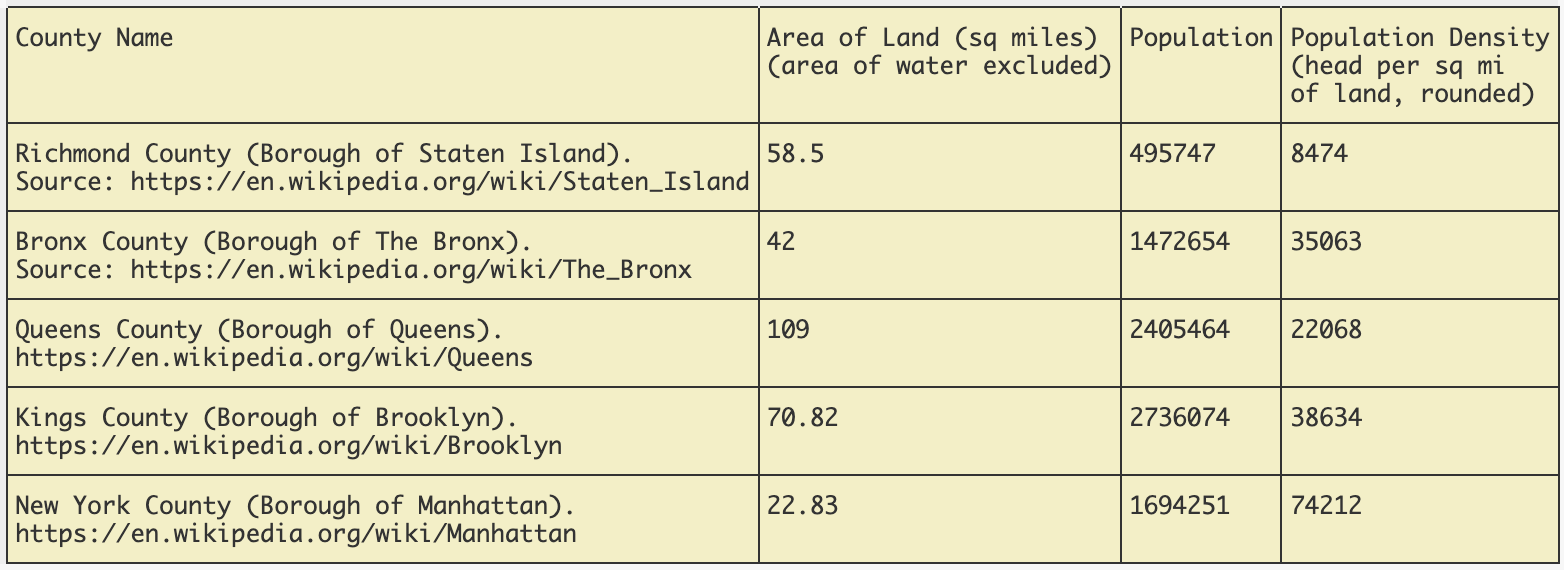

<sub>Table 3 - Table showing land area, population and population density of the five boroughs (counties) of New York City. Data sourced from the 2020 US Census, available from US Census Bureau (2021).</sub>

A data frame was then constructed containing normalised land area, population, density, and median collision statistics for each county. 

The median collision value was plotted against the land area, population and density, to get a visual representation.

The correlation coefficient between each feature of the data frame and the median collision value of each county was then calculated, to determine the strength of the correlation between these features and collisions. 

In [ ]:
# create dataframe of population, density, land area and median collisions (normalised) for each county.
county_name <- c('Richmond County', 'Bronx County', 'Queens County', 'Kings County', 'New York County');
land_area <- normalise(c(58.5, 42, 109, 70.82, 22.83));
population <- normalise(c(495747, 1472654, 2405464, 2736074, 1694251));
density <- normalise(c(8474, 35063, 22068, 38634, 74212));
median_normalised_collisions <- c(0.07895, 0.29612, 0.6376, 0.66245, 0.50211);
county_stats <- data.frame(county_name, land_area, population, density, median_normalised_collisions);

In [ ]:
# verify the dataframe
head(county_stats)

In [ ]:
# plot population land area vs median collisions
ggplot()+
geom_line(data=county_stats, aes(land_area, median_normalised_collisions))
# plot median collisions vs land area
ggplot()+
geom_line(data=county_stats, aes(median_normalised_collisions, land_area))

In [ ]:
# get correlation coefficient (Pearson's R) for median collisions vs land area
cor(county_stats$median_normalised_collisions, county_stats$land_area, use="complete.obs", method="pearson")

In [ ]:
# plot population vs median collisions
ggplot()+
geom_line(data=county_stats, aes(population, median_normalised_collisions))
# plot median collisions vs population
ggplot()+
geom_line(data=county_stats, aes(median_normalised_collisions, population))

In [ ]:
# get correlation coefficient (Pearson's R) for median collisions vs population
cor(county_stats$median_normalised_collisions, county_stats$population, use="complete.obs", method="pearson")

In [ ]:
# plot population density vs median collisions
ggplot()+
geom_line(data=county_stats, aes(density, median_normalised_collisions))
# plot median collisions vs population density
ggplot()+
geom_line(data=county_stats, aes(median_normalised_collisions, density))

In [ ]:
# get correlation coefficient (Pearson's R) for median collisions vs population density
cor(county_stats$median_normalised_collisions, county_stats$density, use="complete.obs", method="pearson")

From the plots and calculations above, an almost perfect positive linear relationship between population of a geographical area and the number of collisions is clearly evident. This correlation is at least twice as strong as for collisions vs population density and collisions vs land area. 

However, this result is to be expected in terms of absolute population numbers. The ratio of collisions per head of population may be a better metric for identifying the main driver of collision rate differences between counties. 

Below, the collision rate per head for each county it calculated. Counties are then ordered by collisions per head. The correlation coefficients are also calculated for collisions per head against population, population density and land area, for comparison.

In [ ]:
# import library for displaying sorted columns
library(dplyr)
# calculate normalised collisions per head
collisions_per_head <- c(0.07895/495747, 0.29612/1472654, 0.6376/2405464, 0.66245/2736074, 0.50211/1694251);
# add collisions per head to dataframe
county_stats <- data.frame(county_stats, collisions_per_head)
# print estimated collisions per head, with population, county and land area. Ordered by collisions per head
county_col_per_head <- data.frame(county_stats$county_name, county_stats$collisions_per_head, county_stats$median_normalised_collisions, county_stats$density, county_stats$population, county_stats$land_area)
county_col_per_head %>% arrange(desc(collisions_per_head))

In [ ]:
# get correlation coefficient (Pearson's R) for est. collisions per head vs population density
cor(county_stats$collisions_per_head, county_stats$density, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) for est. collisions per head vs population
cor(county_stats$collisions_per_head, county_stats$population, use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient (Pearson's R) for est. collisions per head vs population
cor(county_stats$collisions_per_head, county_stats$land_area, use="complete.obs", method="pearson")

As seen above, each county is ranked thus in terms of normalised collisions per head (higher to lower):

1. New York County
2. Queens County
3. Kings County
4. Bronx County
5. Richmond County

The correlation coefficient between collisions-per-head and absolute population is 0.68, while between collisions-per-head and population density it is 0.77. 

So it appears the ratio of collisions per head of population for each county has a stronger association with a county's *population density* than its absolute population size. It's not a perfect linear relationship, however, with Queens County having the second highest collisions per head despite the 4th highest population density. However, for the other 4 counties, the linear correlation holds.

It might be speculated that this higher collision risk in more densely populated counties is a function of more vehicles tending to move in relatively closer proximity in urban environments, such as New York County (Borough of Manhattan).

Both the population and population density should therefore be considered for the purpose of predictive modelling with a view to informing emergency service resource management and collision mitigation strategies.

#### 4.2.3.3 Day of the Week (day)
Now the relationship between collisions and day of the week will be investigated.

Data is initially plotted to see if any linear correlations are immediately evident.

The standard correlation coefficient (Pearson's r) is also calculated to inform the analysis.

First, the non-spatial dataset is plotted.
##### 4.2.3.3.1 All Counties


In [ ]:
# plot number of collisions vs day of the week for all years 2013 - 2019
plot(data_collisions_2013_to_2019_norm$day, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Number of Collisions vs Day of the Week")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for collisions vs day of the week, all years 2013-2019
cor(data_collisions_2013_to_2019_norm$day, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

There appears to be a huge overlap in the number of collisions for each day of the week, with a weak negative linear correlation (with a coefficient of -0.31). However, a stronger positive linear relationship may be imagined if day 6 (Saturday) and 7 (Sunday) were moved to the beginning of the week.

This move is done below. 

A function is first created, to allow the process to be easily repeated on different datasets:

In [ ]:
# create function to move last 2 days of week to beginning of week
reorder_end_2_days_to_start <- function(day) {
  day <- day+2;
  day[day == 8] <- 1;
  day[day == 9] <- 2;
  return(day)
}

In [ ]:
# plot the collisions vs day now last 2 days moved to start of week, for all years 2013-2019
plot(reorder_end_2_days_to_start(data_collisions_2013_to_2019_norm$day), data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Number of Collisions vs Day of the Week")

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for collisions vs day, with last 2 days moved to start of week, for all years 2013-2019
cor(reorder_end_2_days_to_start(data_collisions_2013_to_2019_norm$day), data_collisions_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

A much stronger, positive linear relationship between the number of collisions and day of week was observed following the movement of Saturday and Sunday to the beginning of the week. This was confirmed by a correlation coefficient of 0.48, which may be considered a 'moderate' positive linear correlation.

The positive linear relationship of rising collision numbers as the week progresses from Saturday to Friday - with the notable exception of Sunday -  may be observed in the plot.

This linear relationship between collisions and day of week is now examined for each year individually, using the cleaned and normalised 'yearly' data, created above. 

This is done to determine whether there is any significant difference between years for this correlation, and to detect whether the coefficient is being unduly influenced by any outlier years.

The days of week are again reordered for every year's data, moving Saturday and Sunday to the beginning of the week.

The results are presented in tabular form, below the plots and calculations.

In [ ]:
# plot collisions vs day of the week for 2013, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2013_norm$day), data_collisions_2013_norm$NUM_COLLISIONS, main="2013 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2013, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2013_norm$day), data_collisions_2013_norm$NUM_COLLISIONS)

In [ ]:
# plot collisions vs day of the week for 2014, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2014_norm$day), data_collisions_2014_norm$NUM_COLLISIONS, main="2014 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2014, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2014_norm$day), data_collisions_2014_norm$NUM_COLLISIONS)

In [ ]:
# plot collisions vs day of the week for 2015, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2015_norm$day), data_collisions_2015_norm$NUM_COLLISIONS, main="2015 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2015, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2015_norm$day), data_collisions_2015_norm$NUM_COLLISIONS)

In [ ]:
# plot collisions vs day of the week for 2016, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2016_norm$day), data_collisions_2016_norm$NUM_COLLISIONS, main="2016 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2016, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2016_norm$day), data_collisions_2016_norm$NUM_COLLISIONS)

In [ ]:
# plot collisions vs day of the week for 2017, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2017_norm$day), data_collisions_2017_norm$NUM_COLLISIONS, main="2017 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2017, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2017_norm$day), data_collisions_2017_norm$NUM_COLLISIONS)

In [ ]:
# plot collisions vs day of the week for 2018, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2018_norm$day), data_collisions_2018_norm$NUM_COLLISIONS, main="2018 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2018, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2018_norm$day), data_collisions_2018_norm$NUM_COLLISIONS)

In [ ]:
# plot collisions vs day of the week for 2019, using cleaned, normalised dataset, with end 2 days of week moved to start.
plot(reorder_end_2_days_to_start(data_collisions_2019_norm$day), data_collisions_2019_norm$NUM_COLLISIONS, main="2019 - Number of Collisions vs Day of the Week")

In [ ]:
# get standard correlation coefficient (Pearson's R) for collisions vs day of the week for 2019, using cleaned, normalised dataset, with end 2 days of week moved to start.
cor(reorder_end_2_days_to_start(data_collisions_2019_norm$day), data_collisions_2019_norm$NUM_COLLISIONS)

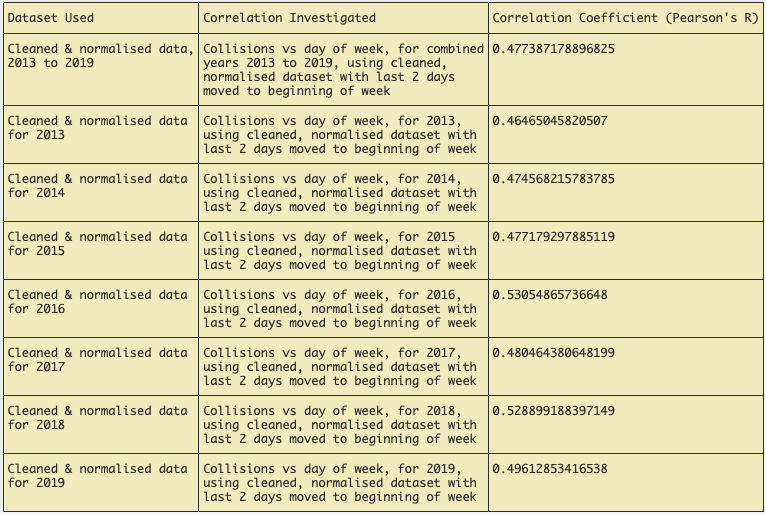

<sub>Table 4 - Correlation coefficients (Pearson's R) for collisions vs day of the week, where last 2 days of week are switched to beginning of week.</sub>

The results show that the correlation coefficients for all years are within 0.7 of each other, indicating the there are no outlier years hugely distorting the correlation. A 'moderate' (defined as 0.40 to 0.59) linear correlation for day of week vs collisions - when a week begins on a Saturday - is clear for every year from 2013 to 2019.

The above process is now repeated for each county individually, to see if there is any significant difference between the correlation coefficients. Again, the results are tabulated below the calculations.

##### 4.2.3.3.1 New York County

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for New York County collisions vs Day of the Week
cor(reorder_end_2_days_to_start(data_collisions_2013_to_2019_new_york_norm$day), data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

##### 4.2.3.3.2 Kings County

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for Kings County collisions vs Day of the Week
cor(reorder_end_2_days_to_start(data_collisions_2013_to_2019_kings_norm$day), data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

##### 4.2.3.3.3 Queens County

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for Queens County collisions vs Day of the Week
cor(reorder_end_2_days_to_start(data_collisions_2013_to_2019_queens_norm$day), data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

##### 4.2.3.3.4 Bronx County

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for Bronx County collisions vs Day of the Week
cor(reorder_end_2_days_to_start(data_collisions_2013_to_2019_bronx_norm$day), data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

##### 4.2.3.3.5 Richmond County

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) for Richmond County collisions vs Day of the Week
cor(reorder_end_2_days_to_start(data_collisions_2013_to_2019_richmond_norm$day), data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

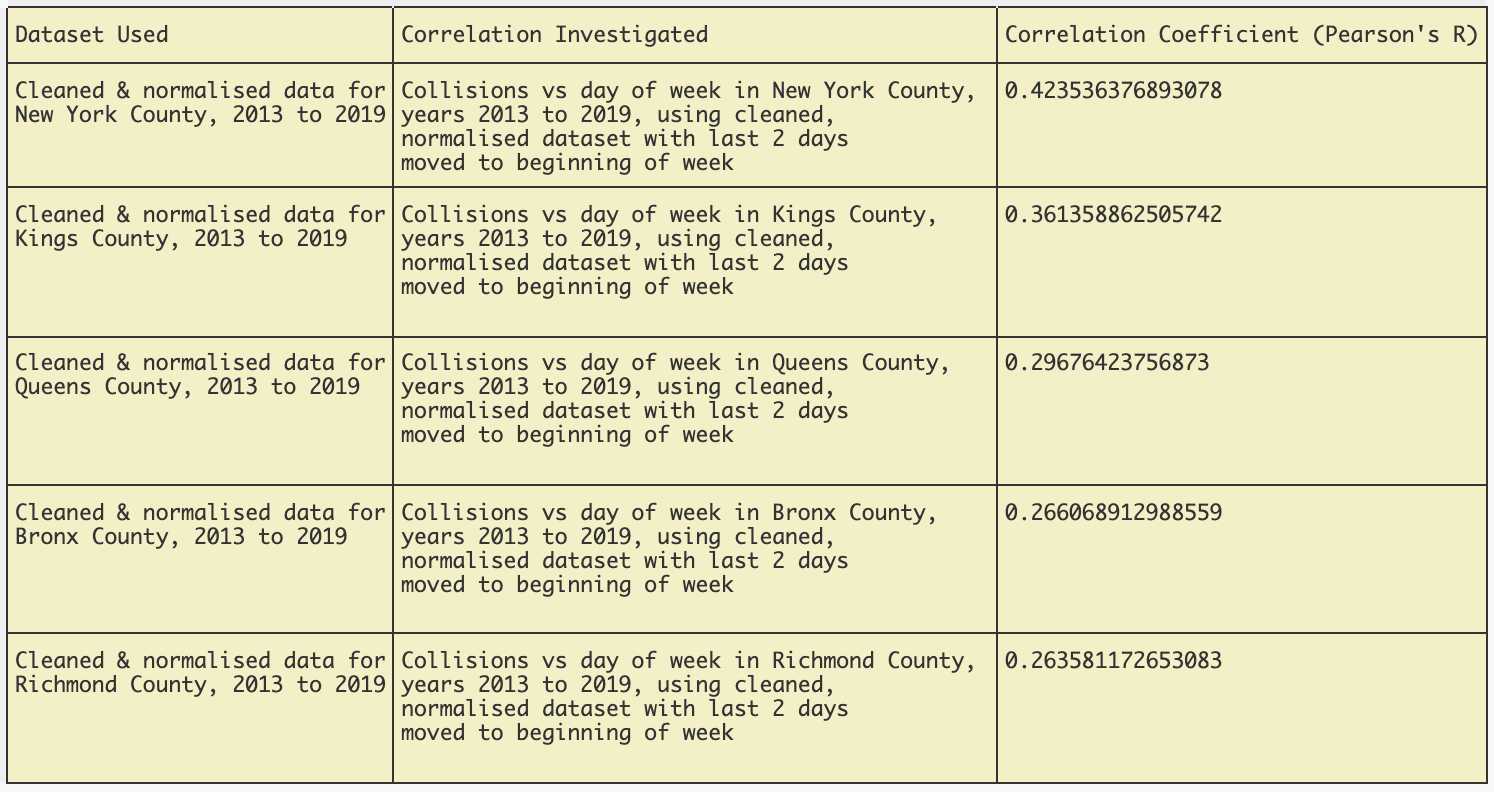

When each county was evaluated independently, the datasets produced similar results. New York County, Kings County, Queens County & Bronx County all showed weak positive linear correlations (0.20 - 0.39), although fell short of the moderate correlation (0.48) shown for the dataset without the geographical data. New York County did show a moderate correlation however, at 0.42.

Again, the difference here is likely explained in terms of the reduced size of the spatial dataset. The question here was whether a significant difference *between* counties was evident; it was not.

In light of above findings, a variable will now be created where the final 2 'day' positions are switched to the beginning of the week (i.e., effectively making weeks begin on a Saturday), ready for later export as a dataset for linear regression modelling.

In [ ]:
# Create variable for collisions data 2013-2019, where week begins on Monday (original dataset, without county data)
## re-create data with new day column
data_collisions_2013_to_2019_norm_wk_sat_fri <- cbind(reorder_end_2_days_to_start(data_collisions_2013_to_2019_norm$day), data_collisions_2013_to_2019_norm)
## remove old day column
data_collisions_2013_to_2019_norm_wk_sat_fri <- data_collisions_2013_to_2019_norm_wk_sat_fri[, -4]
## rename new day column
names(data_collisions_2013_to_2019_norm_wk_sat_fri)[names(data_collisions_2013_to_2019_norm_wk_sat_fri) == 'reorder_end_2_days_to_start(data_collisions_2013_to_2019_norm$day)'] <- 'day'
## check success by comparing head of original dataset to new
head(data_collisions_2013_to_2019_norm)
head(data_collisions_2013_to_2019_norm_wk_sat_fri)

#### 4.2.3.4 Summary of Working Variables

Here is a summary of working variables created in the above sections. These will be used to inform subsequent analyses. Some of these will also be exported in the 'results' section, as datasets for the linear regressor and deep neural network modelling.

- `data_collisions` : Originally imported, uncleaned, un-normalised data (no counties) for 2012 to 2021
- `data_collisions_2013_to_2019_norm` : Cleaned & normalised data from original dataset (no counties) for 2013 to 2019
- `data_collisions_2013_to_2018_norm` : Cleaned & normalised data from original dataset (no counties) for 2013 to 2018
- `data_collisions_2013_to_2019_norm_wk_sat_fri` : Cleaned & normalised data from original dataset (no counties) for 2013 to 2019 where days switched so week begins on a Saturday.
- `data_collisions_co_2013_to_2019_norm` : Cleaned & normalised data from dataset with counties, for 2013 to 2019
- `data_collisions_2013_norm` : Cleaned & normalised data from original dataset (no counties) for 2013. 
- `data_collisions_2014_norm` : Cleaned & normalised data from original dataset (no counties) for 2014. 
- `data_collisions_2015_norm` : Cleaned & normalised data from original dataset (no counties) for 2015. 
- `data_collisions_2016_norm` : Cleaned & normalised data from original dataset (no counties) for 2016. 
- `data_collisions_2017_norm` : Cleaned & normalised data from original dataset (no counties) for 2017. 
- `data_collisions_2018_norm` : Cleaned & normalised data from original dataset (no counties) for 2018. 
- `data_collisions_2019_norm` : Cleaned & normalised data from original dataset (no counties) for 2019. 
- `data_collisions_2013_to_2019_day_1_to_175_norm` : Clearned & normalised data, from the original dataset (no counties) for the first 175 days of all years 2013 to 2019.
- `data_collisions_2013_to_2019_new_york_norm` : Cleaned & normalised data from the dataset with counties, for only the county of 'New York County', 2013 to 2019.
- `data_collisions_2013_to_2019_queens_norm` : Cleaned & normalised data from the dataset with counties, for only the county of 'Queens County', 2013 to 2019.
- `data_collisions_2013_to_2019_kings_norm` : Cleaned & normalised data from the dataset with counties, for only the county of 'Kings County', 2013 to 2019.
- `data_collisions_2013_to_2019_bronx_norm` : Cleaned & normalised data from the dataset with counties, for only the county of 'Bronx County', 2013 to 2019.
- `data_collisions_2013_to_2019_richmond_norm` : Cleaned & normalised data from the dataset with counties, for only the county of 'Richmond County', 2013 to 2019.
- `data_collisions_2013_to_2019_kings_queens_bronx_norm` : Cleaned & normalised data from the dataset with counties, for the counties of Queens County, Bronx County and Kings County combined, 2013 - 2019.

During the following examination of the weather features, the full original and full spatial datasets will be used for the initial analysis. The reason for this is that it's assumed any significant patterns pertinent to the objective of finding long term correlations - specifically in relation to weather events - would be evident when observing the datasets as a whole, to a greater or lesser extent. 

The finer grained investigation of seasonal and other patterns that may be evident in more processed data frames (e.g., removal of years, certain counties, etc.) is viewed as complementary to the detection of long term predictive tends.

Any feature(s) presenting a clear linear correlation from initial analysis may then also be investigated in terms of the additional processed data frames as recorded in the list above, with a view to establishing significant differences and patterns, and in pursuit of a further strengthening of observed correlations.

#### 4.2.3.5 Precipitation (prcp)

Now precipitation levels will be examined to determine if there is a correlation with collisions.

First, a summary and initial plot of precipitation values will be obtained to inform axis scale.

In [ ]:
# get summary of precipitation values
summary(data_collisions_2013_to_2019_norm$prcp)

In [ ]:
# plot showing precipitation against the normalised collisions 2013 to 2019 (all counties)
plot(data_collisions_2013_to_2019_norm$prcp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Normalised Collisions vs. precipitation", xlim=c(0,3.8), ylim=c(0,1))

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r)
cor(data_collisions_2013_to_2019_norm$prcp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

The plot shows that most collisions occur when there's well under 1 inch of precipitation. The mean value is 0.12 inches (as seen from the summary) with 75% of collisions occurring at 0.06 inches and under. The mean value is clearly a distorted 'average' owing to outlier values, whilst the median is actually zero precipitation. The correlation coefficient stands at 0.02; no significant linear correlation is immediately evident.

To determine whether there is a trend at the lower end of the scale, a new plot is generated with a scale now set to a maximum of 0.3 inches of precipitation.

In [ ]:
# plot showing precipitation against the normalised collisions 2013 to 2019 (all counties) with adjusted x-axis scale
plot(data_collisions_2013_to_2019_norm$prcp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Normalised Collisions vs. precipitation", xlim=c(0,0.3), ylim=c(0,1))

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) with adjusted scale
cor(data_collisions_2013_to_2019_norm$prcp[data_collisions_2013_to_2019_norm$prcp<=0.3], data_collisions_2013_to_2019_norm$NUM_COLLISIONS[data_collisions_2013_to_2019_norm$prcp<=0.3], use="complete.obs", method="pearson")

The correlation coefficient, -0.02, has actually switched to a negative value, indicating decreasing collisions as the precipitation level rises. However, this is such a weak correlation that it is essentially insignificant.

Now, each month will be examined independently to see if any correlation is evident between collisions and precipitation, depending on month of the year.
The data is split into a variable for each month and the correlation coefficient calculated.

First, the months are split from the dataset and assigned to their own variables. These variables may also then be used for analysis of subsequent weather variables.

In [ ]:
data_collisions_2013_to_2019_norm_jan <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 1), ]
data_collisions_2013_to_2019_norm_feb <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 2), ]
data_collisions_2013_to_2019_norm_mar <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 3), ]
data_collisions_2013_to_2019_norm_apr <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 4), ]
data_collisions_2013_to_2019_norm_may <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 5), ]
data_collisions_2013_to_2019_norm_jun <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 6), ]
data_collisions_2013_to_2019_norm_jul <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 7), ]
data_collisions_2013_to_2019_norm_aug <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 8), ]
data_collisions_2013_to_2019_norm_sep <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 9), ]
data_collisions_2013_to_2019_norm_oct <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 10), ]
data_collisions_2013_to_2019_norm_nov <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 11), ]
data_collisions_2013_to_2019_norm_dec <- data_collisions_2013_to_2019_norm[which(data_collisions_2013_to_2019_norm$mo == 12), ]


Now, the correlation coefficients are calculated for each month, over the entire range of years (2013 to 2019).

In [ ]:
# get correlation coefficient for collisions and precipitation over all January months
cor(data_collisions_2013_to_2019_norm_jan$prcp[data_collisions_2013_to_2019_norm_jan$prcp<=0.3], 
data_collisions_2013_to_2019_norm_jan$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jan$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all February months
cor(data_collisions_2013_to_2019_norm_feb$prcp[data_collisions_2013_to_2019_norm_feb$prcp<=0.3], 
data_collisions_2013_to_2019_norm_feb$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_feb$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all March months
cor(data_collisions_2013_to_2019_norm_mar$prcp[data_collisions_2013_to_2019_norm_mar$prcp<=0.3], 
data_collisions_2013_to_2019_norm_mar$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_mar$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all April months
cor(data_collisions_2013_to_2019_norm_apr$prcp[data_collisions_2013_to_2019_norm_apr$prcp<=0.3], 
data_collisions_2013_to_2019_norm_apr$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_apr$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all May months
cor(data_collisions_2013_to_2019_norm_may$prcp[data_collisions_2013_to_2019_norm_may$prcp<=0.3], 
data_collisions_2013_to_2019_norm_may$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_may$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all June months
cor(data_collisions_2013_to_2019_norm_jun$prcp[data_collisions_2013_to_2019_norm_jun$prcp<=0.3], 
data_collisions_2013_to_2019_norm_jun$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jun$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all July months
cor(data_collisions_2013_to_2019_norm_jul$prcp[data_collisions_2013_to_2019_norm_jul$prcp<=0.3], 
data_collisions_2013_to_2019_norm_jul$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jul$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all August months
cor(data_collisions_2013_to_2019_norm_aug$prcp[data_collisions_2013_to_2019_norm_aug$prcp<=0.3], 
data_collisions_2013_to_2019_norm_aug$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_aug$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all September months
cor(data_collisions_2013_to_2019_norm_sep$prcp[data_collisions_2013_to_2019_norm_sep$prcp<=0.3], 
data_collisions_2013_to_2019_norm_sep$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_sep$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all October months
cor(data_collisions_2013_to_2019_norm_oct$prcp[data_collisions_2013_to_2019_norm_oct$prcp<=0.3], 
data_collisions_2013_to_2019_norm_oct$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_oct$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all November months
cor(data_collisions_2013_to_2019_norm_nov$prcp[data_collisions_2013_to_2019_norm_nov$prcp<=0.3], 
data_collisions_2013_to_2019_norm_nov$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_nov$prcp<=0.3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and precipitation over all December months
cor(data_collisions_2013_to_2019_norm_dec$prcp[data_collisions_2013_to_2019_norm_dec$prcp<=0.3], 
data_collisions_2013_to_2019_norm_dec$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_dec$prcp<=0.3], use="complete.obs", method="pearson")

No month appears to show a particularly significant correlation coefficient for precipitation and collisions in real terms, although July and April do seem to show a relative strengthening to a very weak negative correlation, of around -0.11.

Now the correlation coefficients will be calculated for each county individually.

In [ ]:
# correlation coefficient for precipitation vs collisions, New York County 2013-2019
cor(data_collisions_2013_to_2019_new_york_norm$prcp, data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for precipitation vs collisions, Bronx County 2013-2019
cor(data_collisions_2013_to_2019_bronx_norm$prcp, data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for precipitation vs collisions, Queens County 2013-2019
cor(data_collisions_2013_to_2019_queens_norm$prcp, data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for precipitation vs collisions, Kings County 2013-2019
cor(data_collisions_2013_to_2019_kings_norm$prcp, data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for precipitation vs collisions, Richmond County 2013-2019
cor(data_collisions_2013_to_2019_richmond_norm$prcp, data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

The coefficients for each county confirm that no linear correlations appear to be evident.

#### 4.2.3.6 Visibility (visib)

Now visibility will be examined to determine if there is a correlation with collisions.

A summary will be obtained to inform axis scale, before the values are plotted against normalised collisions.

In [ ]:
# get summary of visibility values
summary(data_collisions_2013_to_2019_norm$visib)

In [ ]:
# plot visibility vs normalised collisions for 2013 to 2019 (all counties)
plot(data_collisions_2013_to_2019_norm$visib, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Normalised Collisions vs. Visibility", xlim=c(1,10), ylim=c(0,1))

The median visibility value is 9.4 miles, with the maximum being 10. This shows that visibility during collisions is very tightly bunched around the higher end of the distribution, very close to the 10 mile maximum. It may therefore be reasonably assumed that the vast majority of collisions were not caused by poor visibility. 

To determine whether there was any relationship between declining visibility and collisions at the 'poor visibility' end of the range, a rescaling of the x-axis to values of between 0 and 7 miles was examined.

In [ ]:
# plot visibility against the normalised collisions 2013 to 2019 (all counties) - with rescaled x-axis
plot(data_collisions_2013_to_2019_norm$visib, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main="Normalised Collisions vs. Visibility", xlim=c(0,7), ylim=c(0,1))

A linear correlation does not seem immediately evident from the plot. Now the standard correlation is calculated.

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r) of the visibility range 0 to 7, and normalised collisions
cor(data_collisions_2013_to_2019_norm$visib[data_collisions_2013_to_2019_norm$visib<=7 & 
data_collisions_2013_to_2019_norm$visib>=0], data_collisions_2013_to_2019_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_norm$visib<=7& data_collisions_2013_to_2019_norm$visib>=0], 
use="complete.obs", method="pearson")

At a correlation coefficient of -0.02, no linear correlation is evident. A significant negative linear correlation would have demonstrated collisions falling as visibility improved - as might have been expected - but that is not evident through analysis of the figures.

Now, each month will be examined independently, to see if any correlation is evident between collisions and visibility depending on month of the year.

In [ ]:
# get correlation coefficient for collisions and visibility over all January months
cor(data_collisions_2013_to_2019_norm_jan$visib[data_collisions_2013_to_2019_norm_jan$visib<=7 & data_collisions_2013_to_2019_norm_jan$visib>=0], 
data_collisions_2013_to_2019_norm_jan$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jan$visib<=7 & data_collisions_2013_to_2019_norm_jan$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all February months
cor(data_collisions_2013_to_2019_norm_feb$visib[data_collisions_2013_to_2019_norm_feb$visib<=7 & data_collisions_2013_to_2019_norm_feb$visib>=0], 
data_collisions_2013_to_2019_norm_feb$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_feb$visib<=7 & data_collisions_2013_to_2019_norm_feb$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all March months
cor(data_collisions_2013_to_2019_norm_mar$visib[data_collisions_2013_to_2019_norm_mar$visib<=7 & data_collisions_2013_to_2019_norm_mar$visib>=0], 
data_collisions_2013_to_2019_norm_mar$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_mar$visib<=7 & data_collisions_2013_to_2019_norm_mar$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all April months
cor(data_collisions_2013_to_2019_norm_apr$visib[data_collisions_2013_to_2019_norm_apr$visib<=7 & data_collisions_2013_to_2019_norm_apr$visib>=0], 
data_collisions_2013_to_2019_norm_apr$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_apr$visib<=7 & data_collisions_2013_to_2019_norm_apr$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all May months
cor(data_collisions_2013_to_2019_norm_may$visib[data_collisions_2013_to_2019_norm_may$visib<=7 & data_collisions_2013_to_2019_norm_may$visib>=0], 
data_collisions_2013_to_2019_norm_may$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_may$visib<=7 & data_collisions_2013_to_2019_norm_may$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all June months
cor(data_collisions_2013_to_2019_norm_jun$visib[data_collisions_2013_to_2019_norm_jun$visib<=7 & data_collisions_2013_to_2019_norm_jun$visib>=0], 
data_collisions_2013_to_2019_norm_jun$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jun$visib<=7 & data_collisions_2013_to_2019_norm_jun$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all July months
cor(data_collisions_2013_to_2019_norm_jul$visib[data_collisions_2013_to_2019_norm_jul$visib<=7 & data_collisions_2013_to_2019_norm_jul$visib>=0], 
data_collisions_2013_to_2019_norm_jul$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jul$visib<=7 & data_collisions_2013_to_2019_norm_jul$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all August months
cor(data_collisions_2013_to_2019_norm_aug$visib[data_collisions_2013_to_2019_norm_aug$visib<=7 & data_collisions_2013_to_2019_norm_aug$visib>=0], 
data_collisions_2013_to_2019_norm_aug$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_aug$visib<=7 & data_collisions_2013_to_2019_norm_aug$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all September months
cor(data_collisions_2013_to_2019_norm_sep$visib[data_collisions_2013_to_2019_norm_sep$visib<=7 & data_collisions_2013_to_2019_norm_sep$visib>=0], 
data_collisions_2013_to_2019_norm_sep$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_sep$visib<=7 & data_collisions_2013_to_2019_norm_sep$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all October months
cor(data_collisions_2013_to_2019_norm_oct$visib[data_collisions_2013_to_2019_norm_oct$visib<=7 & data_collisions_2013_to_2019_norm_oct$visib>=0], 
data_collisions_2013_to_2019_norm_oct$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_oct$visib<=7 & data_collisions_2013_to_2019_norm_oct$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and visibility over all November months
cor(data_collisions_2013_to_2019_norm_nov$visib[data_collisions_2013_to_2019_norm_nov$visib<=7 & data_collisions_2013_to_2019_norm_nov$visib>=0], 
data_collisions_2013_to_2019_norm_nov$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_nov$visib<=7 & data_collisions_2013_to_2019_norm_nov$visib>=0], use="complete.obs", method="pearson")

In [ ]:
# plot visibility against the normalised collisions for all November months, 2013 to 2019 (all counties) - with rescaled x-axis
plot(data_collisions_2013_to_2019_norm_nov$visib, data_collisions_2013_to_2019_norm_nov$NUM_COLLISIONS, main="Normalised Collisions in November Months vs. Visibility", xlim=c(3,7), ylim=c(0,1))

In [ ]:
# get correlation coefficient for collisions and visibility over all December months
cor(data_collisions_2013_to_2019_norm_dec$visib[data_collisions_2013_to_2019_norm_dec$visib<=7 & data_collisions_2013_to_2019_norm_dec$visib>=0], 
data_collisions_2013_to_2019_norm_dec$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_dec$visib<=7 & data_collisions_2013_to_2019_norm_dec$visib>=0], use="complete.obs", method="pearson")

January and May show a 'very weak' positive linear correlation between visibility and collisions (i.e., as the visibility improved, the collisions actually rose), however September and November showed a 'very weak' negative and 'weak' negative linear correlation, respectively (collisions rose as visibility declined). November was particularly noteworthy (hence it was also plotted, above), with a very high 'weak negative' correlation coefficient of -0.37. This very nearly reaches the threshold for 'moderate negative' (-0.40).

Now, correlation coefficients for each county are calculated, to identify any differences based on geographical location.

In [ ]:
# correlation coefficient for visibility vs collisions, New York County 2013-2019
cor(data_collisions_2013_to_2019_new_york_norm$visib[data_collisions_2013_to_2019_new_york_norm$visib<=7 & 
data_collisions_2013_to_2019_new_york_norm$visib>=0], data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_new_york_norm$visib<=7 & data_collisions_2013_to_2019_new_york_norm$visib>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for visibility vs collisions, Bronx County 2013-2019
cor(data_collisions_2013_to_2019_bronx_norm$visib[data_collisions_2013_to_2019_bronx_norm$visib<=7 & 
data_collisions_2013_to_2019_bronx_norm$visib>=0], data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_bronx_norm$visib<=7 & data_collisions_2013_to_2019_bronx_norm$visib>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for visibility vs collisions, Queens County 2013-2019
cor(data_collisions_2013_to_2019_queens_norm$visib[data_collisions_2013_to_2019_queens_norm$visib<=7 & 
data_collisions_2013_to_2019_queens_norm$visib>=0], data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_queens_norm$visib<=7 & data_collisions_2013_to_2019_queens_norm$visib>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for visibility vs collisions, Kings County 2013-2019
cor(data_collisions_2013_to_2019_kings_norm$visib[data_collisions_2013_to_2019_kings_norm$visib<=7 & 
data_collisions_2013_to_2019_kings_norm$visib>=0], data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_kings_norm$visib<=7 & data_collisions_2013_to_2019_kings_norm$visib>=0], 
use="complete.obs", method="pearson")

In [ ]:
 # correlation coefficient for visibility vs collisions, Richmond County 2013-2019
cor(data_collisions_2013_to_2019_richmond_norm$visib[data_collisions_2013_to_2019_richmond_norm$visib<=7 & 
data_collisions_2013_to_2019_richmond_norm$visib>=0], data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_richmond_norm$visib<=7 & data_collisions_2013_to_2019_richmond_norm$visib>=0], 
use="complete.obs", method="pearson")


As seen above, no linear correlation was evident between visibility and collisions for any single county.

#### 4.2.3.7 Average Wind Speed (wdsp)

Now average wind speed will be examined to determine if there is a correlation with collisions.

Once more, a summary will first be obtained to inform axis scale.

In [ ]:
# get summary of average wind speed values
summary(data_collisions_2013_to_2019_norm$wdsp)

In [ ]:
# plot average wind speed against the normalised collisions 2013 to 2019 (all counties)
plot(data_collisions_2013_to_2019_norm$wdsp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main=" Normalised Collisions vs. Average Wind Speed", xlim=c(0,36), ylim=c(0,1))

The summary and plot show most values are bunched between around 3 and 10 knots (~3.5 to ~11.5mph). Therefore, the x-scale is adjusted accordingly to visualise any patterns within that range.

In [ ]:
# plot average wind speed against the normalised collisions 2013 to 2019 (all counties) - with rescaled x-axis
plot(data_collisions_2013_to_2019_norm$wdsp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main=" Normalised Collisions vs. Average Wind Speed", xlim=c(3,10), ylim=c(0,1))

A linear correlation does not appear evident. The correlation coefficient is now calculated for values between 3 and 10 knots, and collisions.

In [ ]:
# get the 'standard correlation coefficient' (Pearson's R) for average wind speed vs colllisions, for all counties
cor(data_collisions_2013_to_2019_norm$wdsp[
data_collisions_2013_to_2019_norm$wdsp<=10 & data_collisions_2013_to_2019_norm$wdsp>=3], 
data_collisions_2013_to_2019_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_norm$wdsp<=10 & data_collisions_2013_to_2019_norm$wdsp>=3
],use="complete.obs", method="pearson")

The correlation coefficient of 0.02 shows that no significant linear correlation is evident.

Now, each month will be examined independently to see if any correlation is evident between collisions and average wind speed, depending on month of the year.

In [ ]:
# get correlation coefficient for collisions and average wind speed over all January months
cor(data_collisions_2013_to_2019_norm_jan$wdsp[data_collisions_2013_to_2019_norm_jan$wdsp<=10 & data_collisions_2013_to_2019_norm_jan$wdsp>=3], 
data_collisions_2013_to_2019_norm_jan$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jan$wdsp<=10 & data_collisions_2013_to_2019_norm_jan$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all February months
cor(data_collisions_2013_to_2019_norm_feb$wdsp[data_collisions_2013_to_2019_norm_feb$wdsp<=10 & data_collisions_2013_to_2019_norm_feb$wdsp>=3], 
data_collisions_2013_to_2019_norm_feb$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_feb$wdsp<=10 & data_collisions_2013_to_2019_norm_feb$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all March months
cor(data_collisions_2013_to_2019_norm_mar$wdsp[data_collisions_2013_to_2019_norm_mar$wdsp<=10 & data_collisions_2013_to_2019_norm_mar$wdsp>=3], 
data_collisions_2013_to_2019_norm_mar$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_mar$wdsp<=10 & data_collisions_2013_to_2019_norm_mar$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all April months
cor(data_collisions_2013_to_2019_norm_apr$wdsp[data_collisions_2013_to_2019_norm_apr$wdsp<=10 & data_collisions_2013_to_2019_norm_apr$wdsp>=3], 
data_collisions_2013_to_2019_norm_apr$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_apr$wdsp<=10 & data_collisions_2013_to_2019_norm_apr$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all May months
cor(data_collisions_2013_to_2019_norm_may$wdsp[data_collisions_2013_to_2019_norm_may$wdsp<=10 & data_collisions_2013_to_2019_norm_may$wdsp>=3], 
data_collisions_2013_to_2019_norm_may$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_may$wdsp<=10 & data_collisions_2013_to_2019_norm_may$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all June months
cor(data_collisions_2013_to_2019_norm_jun$wdsp[data_collisions_2013_to_2019_norm_jun$wdsp<=10 & data_collisions_2013_to_2019_norm_jun$wdsp>=3], 
data_collisions_2013_to_2019_norm_jun$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jun$wdsp<=10 & data_collisions_2013_to_2019_norm_jun$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all July months
cor(data_collisions_2013_to_2019_norm_jul$wdsp[data_collisions_2013_to_2019_norm_jul$wdsp<=10 & data_collisions_2013_to_2019_norm_jul$wdsp>=3], 
data_collisions_2013_to_2019_norm_jul$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jul$wdsp<=10 & data_collisions_2013_to_2019_norm_jul$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all August months
cor(data_collisions_2013_to_2019_norm_aug$wdsp[data_collisions_2013_to_2019_norm_aug$wdsp<=10 & data_collisions_2013_to_2019_norm_aug$wdsp>=3], 
data_collisions_2013_to_2019_norm_aug$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_aug$wdsp<=10 & data_collisions_2013_to_2019_norm_aug$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all September months
cor(data_collisions_2013_to_2019_norm_sep$wdsp[data_collisions_2013_to_2019_norm_sep$wdsp<=10 & data_collisions_2013_to_2019_norm_sep$wdsp>=3], 
data_collisions_2013_to_2019_norm_sep$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_sep$wdsp<=10 & data_collisions_2013_to_2019_norm_sep$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all October months
cor(data_collisions_2013_to_2019_norm_oct$wdsp[data_collisions_2013_to_2019_norm_oct$wdsp<=10 & data_collisions_2013_to_2019_norm_oct$wdsp>=3], 
data_collisions_2013_to_2019_norm_oct$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_oct$wdsp<=10 & data_collisions_2013_to_2019_norm_oct$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# plot average wind speed against the normalised collisions for the October months, 2013 to 2019 (all counties) - with rescaled x-axis
plot(data_collisions_2013_to_2019_norm_oct$wdsp, data_collisions_2013_to_2019_norm_oct$NUM_COLLISIONS, main=" Normalised Collisions vs. Average Wind Speed in October", xlim=c(3,10), ylim=c(0,1))

In [ ]:
# get correlation coefficient for collisions and average wind speed over all November months
cor(data_collisions_2013_to_2019_norm_nov$wdsp[data_collisions_2013_to_2019_norm_nov$wdsp<=10 & data_collisions_2013_to_2019_norm_nov$wdsp>=3], 
data_collisions_2013_to_2019_norm_nov$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_nov$wdsp<=10 & data_collisions_2013_to_2019_norm_nov$wdsp>=3], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and average wind speed over all December months
cor(data_collisions_2013_to_2019_norm_dec$wdsp[data_collisions_2013_to_2019_norm_dec$wdsp<=10 & data_collisions_2013_to_2019_norm_dec$wdsp>=3], 
data_collisions_2013_to_2019_norm_dec$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_dec$wdsp<=10 & data_collisions_2013_to_2019_norm_dec$wdsp>=3], use="complete.obs", method="pearson")

A decent 'very weak' positive linear correlation was found for the month of May (0.10), whilst February showed a 'weak' positive correlation of 0.24. October expressed a significant 'weak' positive linear correlation of 0.33, which is approaching the threshold for 'moderate' (0.40).

To ensure there is no significant difference between counties, correlation coefficients for each county were calculated.

In [ ]:
# correlation coefficient for average wind speed vs collisions, New York County 2013-2019
cor(data_collisions_2013_to_2019_new_york_norm$wdsp[data_collisions_2013_to_2019_new_york_norm$wdsp<=7 & 
data_collisions_2013_to_2019_new_york_norm$wdsp>=0], data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_new_york_norm$wdsp<=7 & data_collisions_2013_to_2019_new_york_norm$wdsp>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for average wind speed vs collisions, Bronx County 2013-2019
cor(data_collisions_2013_to_2019_bronx_norm$wdsp[data_collisions_2013_to_2019_bronx_norm$wdsp<=7 & 
data_collisions_2013_to_2019_bronx_norm$wdsp>=0], data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_bronx_norm$wdsp<=7 & data_collisions_2013_to_2019_bronx_norm$wdsp>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for average wind speed vs collisions, Queens County 2013-2019
cor(data_collisions_2013_to_2019_queens_norm$wdsp[data_collisions_2013_to_2019_queens_norm$wdsp<=7 & 
data_collisions_2013_to_2019_queens_norm$wdsp>=0], data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_queens_norm$wdsp<=7 & data_collisions_2013_to_2019_queens_norm$wdsp>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for average wind speed vs collisions, Kings County 2013-2019
cor(data_collisions_2013_to_2019_kings_norm$wdsp[data_collisions_2013_to_2019_kings_norm$wdsp<=7 & 
data_collisions_2013_to_2019_kings_norm$wdsp>=0], data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_kings_norm$wdsp<=7 & data_collisions_2013_to_2019_kings_norm$wdsp>=0], 
use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for average wind speed vs collisions, Richmond County 2013-2019
cor(data_collisions_2013_to_2019_richmond_norm$wdsp[data_collisions_2013_to_2019_richmond_norm$wdsp<=7 & 
data_collisions_2013_to_2019_richmond_norm$wdsp>=0], data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS[
data_collisions_2013_to_2019_richmond_norm$wdsp<=7 & data_collisions_2013_to_2019_richmond_norm$wdsp>=0], 
use="complete.obs", method="pearson")

No significant linear correlation was evident between average wind speed and collisions for any county by itself.

#### 4.2.3.8 Mean Temperature (temp)

Now mean temperature values will be examined to determine if there is a correlation with collisions.

As before, a summary will be obtained to inform axis scale, before the values are plotted against normalised collisions.

In [ ]:
# get summary of mean temperature
summary(data_collisions_2013_to_2019_norm$temp)

In [ ]:
# plot mean temperature against the normalised collisions 2013 to 2019 (all counties)
plot(data_collisions_2013_to_2019_norm$temp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, main=" Normalised Collisions vs. Mean Temperature", xlim=c(10,80), ylim=c(0,1))

The plot may be suggestive of a weak linear correlation. The correlation coefficient is calculated below.

In [ ]:
# get the 'standard correlation coefficient' (Pearson's r)
cor(data_collisions_2013_to_2019_norm$temp, data_collisions_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient of 0.21 does indeed suggest a 'weak' linear correlation.

Now, each month will be examined independently to see if any correlation is evident between collisions and mean temperature, depending on month of the year.


In [ ]:
# get correlation coefficient for collisions and mean temperature over all January months
cor(data_collisions_2013_to_2019_norm_jan$temp[data_collisions_2013_to_2019_norm_jan$temp], 
data_collisions_2013_to_2019_norm_jan$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jan$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all February months
cor(data_collisions_2013_to_2019_norm_feb$temp[data_collisions_2013_to_2019_norm_feb$temp], 
data_collisions_2013_to_2019_norm_feb$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_feb$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all March months
cor(data_collisions_2013_to_2019_norm_mar$temp[data_collisions_2013_to_2019_norm_mar$temp], 
data_collisions_2013_to_2019_norm_mar$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_mar$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all April months
cor(data_collisions_2013_to_2019_norm_apr$temp[data_collisions_2013_to_2019_norm_apr$temp], 
data_collisions_2013_to_2019_norm_apr$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_apr$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all May months
cor(data_collisions_2013_to_2019_norm_may$temp[data_collisions_2013_to_2019_norm_may$temp], 
data_collisions_2013_to_2019_norm_may$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_may$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all June months
cor(data_collisions_2013_to_2019_norm_jun$temp[data_collisions_2013_to_2019_norm_jun$temp], 
data_collisions_2013_to_2019_norm_jun$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jun$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all July months
cor(data_collisions_2013_to_2019_norm_jul$temp[data_collisions_2013_to_2019_norm_jul$temp], 
data_collisions_2013_to_2019_norm_jul$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_jul$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all August months
cor(data_collisions_2013_to_2019_norm_aug$temp[data_collisions_2013_to_2019_norm_aug$temp], 
data_collisions_2013_to_2019_norm_aug$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_aug$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all September months
cor(data_collisions_2013_to_2019_norm_sep$temp[data_collisions_2013_to_2019_norm_sep$temp], 
data_collisions_2013_to_2019_norm_sep$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_sep$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all October months
cor(data_collisions_2013_to_2019_norm_oct$temp[data_collisions_2013_to_2019_norm_oct$temp], 
data_collisions_2013_to_2019_norm_oct$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_oct$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all November months
cor(data_collisions_2013_to_2019_norm_nov$temp[data_collisions_2013_to_2019_norm_nov$temp], 
data_collisions_2013_to_2019_norm_nov$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_nov$temp], use="complete.obs", method="pearson")

In [ ]:
# get correlation coefficient for collisions and mean temperature over all December months
cor(data_collisions_2013_to_2019_norm_dec$temp[data_collisions_2013_to_2019_norm_dec$temp], 
data_collisions_2013_to_2019_norm_dec$NUM_COLLISIONS[data_collisions_2013_to_2019_norm_dec$temp], use="complete.obs", method="pearson")

May, October and November show very high 'very weak' positive linear correlations. June and February have crossed the threshold to show 'weak' positive linear correlations, whilst September shows a very high 'weak' positive, almost amounting to 'moderate'.

July shows a very good 'moderate' linear correlation.

August shows a 'very weak' negative correlation (a trend of declining collisions as a function of increasing temperature). January again shows a negative correlation, but has crossed the threshold to 'weak'.

To further explore whether there is any difference between counties, the linear correlation for each county is calculated below.

In [ ]:
# correlation coefficient for mean temperature vs collisions, all counties (county dataset)
cor(data_collisions_co_2013_to_2019_norm$temp, data_collisions_co_2013_to_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient for all counties using the spatial dataset is significantly weaker than that yielded from the original non-spatial dataset. This is likely another example of the effect of having fewer data-points in the spatial dataset, owing to removal of records without geographical information.

The key metric we're concerned with here, however, is the *difference* between the counties - if any.


In [ ]:
# correlation coefficient for mean temperature vs collisions, New York County 2013-2019
cor(data_collisions_2013_to_2019_new_york_norm$temp, data_collisions_2013_to_2019_new_york_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, Bronx County 2013-2019
cor(data_collisions_2013_to_2019_bronx_norm$temp, data_collisions_2013_to_2019_bronx_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, Queens County 2013-2019
cor(data_collisions_2013_to_2019_queens_norm$temp, data_collisions_2013_to_2019_queens_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, Kings County 2013-2019
cor(data_collisions_2013_to_2019_kings_norm$temp, data_collisions_2013_to_2019_kings_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, Bronx County 2013-2019
cor(data_collisions_2013_to_2019_richmond_norm$temp, data_collisions_2013_to_2019_richmond_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

Both New York County (Manhattan) and Kings County (Brooklyn) have correlation coefficients above 0.20 and may be classified as exhibiting a 'weak' positive linear correlation. Bronx and Queens Counties show slightly weaker positive correlations (classified 'very weak'), while Richmond County (Staten Island) is a clear, significant outlier, at -0.007.

The correlation coefficients will now be calculated for each year independently, using the original non-spatial dataset.

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2013
cor(data_collisions_2013_norm$temp, data_collisions_2013_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2014
cor(data_collisions_2014_norm$temp, data_collisions_2014_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2015
cor(data_collisions_2015_norm$temp, data_collisions_2015_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2016
cor(data_collisions_2016_norm$temp, data_collisions_2016_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2017
cor(data_collisions_2017_norm$temp, data_collisions_2017_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2018
cor(data_collisions_2018_norm$temp, data_collisions_2018_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

In [ ]:
# correlation coefficient for mean temperature vs collisions, 2019
cor(data_collisions_2019_norm$temp, data_collisions_2019_norm$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient is above 0.20 for 5 of the 7 years in the range. The 3 years with the highest coefficient were 2015, 2017 and 2018.

These 5 years are now combined, with the exclusion of the 2 where the correlation was weakest (2013 and 2019).

In [ ]:
# combine data for years with correlation coefficients above 2.0.
highest_5 <- rbind(data_collisions_2014_norm, data_collisions_2015_norm, data_collisions_2016_norm, data_collisions_2017_norm, data_collisions_2018_norm)

In [ ]:
# plot combined years with correlation coefficients above 2.0.
plot(highest_5$temp, highest_5$NUM_COLLISIONS, main="Normalised Collisions vs. Mean Temperature - Best 5", xlim=c(10,80), ylim=c(0,1))

In [ ]:
# correlation coefficient for mean temperature vs collisions for 2014-2018
cor(highest_5$temp, highest_5$NUM_COLLISIONS, use="complete.obs", method="pearson")

The correlation coefficient for 2014 to 2018 is 0.24 - a slightly stronger 'weak' linear correlation, but with a difference of only 0.03, not significantly so.

Now the correlation coefficient will be calculated for just the first 175 days of the year, which was previously found to exhibit the strongest correlation between collision numbers and the day-of-year.

In [ ]:
cor(data_collisions_2013_to_2019_day_1_to_175_norm$temp, data_collisions_2013_to_2019_day_1_to_175_norm$NUM_COLLISIONS)

The linear correlation increases from 0.21 for the dataset containing entire years, by 0.11, to 0.32 for the dataset containing only the first 175 days. Whilst still classified as a 'weak' correlation, this increase is significant.

The analysis for mean temperature has shown it to be a candidate feature for linear regression modelling.

# 5 Export of Result Datasets

In this section, datasets will be created and exported as CSV files ready for the linear regression and deep neural network (DNN) modelling. 

The composition of these data in terms of range and scope, together with feature selection, is informed by the results of the previous analyses. These results are further summarised in the 'Conclusions' section that closes this report.

## 5.1 Datasets To Be Exported

The selected features will be exported as part of the following previously constructed datasets (refer to 'Summary of Working Variables' section (4.2.3.4) for full descriptions):

- `data_collisions_2013_to_2018_norm` (exported for linear regression modelling only)
- `data_collisions_2013_to_2019_norm` (exported for both linear regression & DNN modelling)
- `data_collisions_2013_to_2019_norm_wk_sat_fri` (exported for linear regression modelling only)
- `data_collisions_2013_to_2019_day_1_to_175_norm` (exported for linear regression modelling only)
- `data_collisions_co_2013_to_2019_norm` (exported for DNN only)
- `data_collisions_2013_to_2019_kings_queens_bronx_norm` (exported for linear regression modelling only)
- `data_collisions_2013_to_2019_bronx_norm` : (exported for linear regression modelling only)

The data features to be included in these datasets are described during the export processes below (sections 5.3 & 5.4).

### 5.2 Define Function to Remove Test Sample

A small, random test set of sample data is required to be removed from the datasets prior to export, to be used later in checking how the created models perform.

Here, a function is defined to save the samples as CSV files and remove them from the datasets to be exported for modelling.

As the datasets are relatively tiny, only 10 rows will be removed from each dataset, with the exception of `data_collisions_2013_to_2019_kings_queens_bronx_norm`, where 30 rows will be taken, owing to its having 3 times a many rows, and `data_collisions_2013_to_2019_day_1_to_175_norm`, where 5 rows will be taken, owing to its having around half as many rows, due to removal of almost 6 months of each year.

The following sample removal function will be called during the export process for each dataset.

In [ ]:
# function to remove rows from dataset & save removed sample as a csv
remove_sample <- function(dataset, num_rows, filename) {
  # count existing rows, to allow verification of removed rows later
  print(nrow(dataset))
  # get random sample of n (num_rows) rows 
  random_sample <- dataset[sample(nrow(dataset), num_rows),]
  # write sample to csv
  write.csv(random_sample, file=filename)
  # loop sampled rows
  for (row in row.names(random_sample)) {
    # remove each sampled row from dataset
    dataset <- dataset[row.names(dataset) != as.numeric(row),, drop = FALSE];
  }
  # verify dataset is num_rows fewer
  print(nrow(dataset))
  # return dataset (now with sample having been removed)
  return(dataset);
}

## 5.3 Export for Linear Regression Modelling



The following features were identified in the analysis to be exported for linear regression modelling:

- Year (year)
- Index of days, over the range of the dataset (day_index)
- Day of week (day)
- Month (mo)
- Mean temperature (temp)
- Average Wind Speed (wdsp)
- Visibility (visib)

Of the weather features, mean temperature and visibility appeared to be the strongest candidates for linear regression modelling. Average wind speed was also selected, due to the potential month-dependent correlations. As seen from the analyses above, correlations for collisions with visibility and collisions with average wind speed both appear, to some extent, to be month dependent.

Month (mo) was selected, in addition to the other temporal features of day index (day_index), day of week (day), and year (year), as it was felt regression modelling by month may establish correlation(s) between the weather features and season of year (as per the case of visibility). 

Reasons for any such month-dependent correlation may be speculated; for example, collisions could be affected by a weather feature such as visibility only during those months when visibility differs from its regular state over the course of the year.

Here, the datasets for linear regression modelling will now be exported to CSV files.

The features exported in each CSV are denoted in the code comments.

### 5.3.1 Dataset for 2013-2018

In [ ]:
# view columns
colnames(data_collisions_2013_to_2018_norm)

In [ ]:
# select columns [day_index, day, year, mo, temp, visib, wdsp, NUM_COLLISIONS]
selected_1 <- data_collisions_2013_to_2018_norm[,c(1,3,4,5,8,11,12,24)]
# verify successful selection
head(selected_1)

In [ ]:
# remove sample of 10 rows from dataset
selected_1 <- remove_sample(selected_1, 10, "/content/sample_linear_1.csv")

In [ ]:
# export CSV
write.csv(selected_1, file="/content/linear_1.csv")

### 5.3.2 Datasets for 2013-2019

In [ ]:
# view columns
colnames(data_collisions_2013_to_2019_norm)

In [ ]:
# select columns [day_index, day, year, mo, temp, visib, wdsp, NUM_COLLISIONS]
selected_2<- data_collisions_2013_to_2019_norm[,c(1,3,4,5,8,11,12,24)]
# verify successful selection
head(selected_2)

In [ ]:
# remove sample of 10 rows from dataset
selected_2 <- remove_sample(selected_2, 10, "/content/sample_linear_2.csv")

In [ ]:
# export CSV
write.csv(selected_2, file="/content/linear_2.csv")

### 5.3.3 Datasets for 2013-2019 - Week Beginning Saturday



In [ ]:
# view columns
colnames(data_collisions_2013_to_2019_norm_wk_sat_fri)

In [ ]:
# select columns [day_index, day, year, mo, temp, visib, wdsp, NUM_COLLISIONS]
selected_3 <- data_collisions_2013_to_2019_norm_wk_sat_fri[,c(1,2,4,5,8,11,12,24)]
# verify successful selection
head(selected_3)

In [ ]:
# remove sample of 10 rows from dataset
selected_3 <- remove_sample(selected_3, 10, "/content/sample_linear_3.csv")

In [ ]:
# export CSV
write.csv(selected_3, file="/content/linear_3.csv")

### 5.3.4 Dataset for 2013-2019 - First 175 Days of Each Year

In [ ]:
# view columns
colnames(data_collisions_2013_to_2019_day_1_to_175_norm)

In [ ]:
# select columns [day_index, day, year, mo, temp, visib, wdsp, NUM_COLLISIONS]
selected_4 <- data_collisions_2013_to_2019_day_1_to_175_norm[,c(1,3,4,5,8,11,12,24)]
# verify successful selection
head(selected_4)

In [ ]:
# remove sample of 5 rows from dataset
selected_4 <- remove_sample(selected_4, 5, "/content/sample_linear_4.csv")

In [ ]:
# export CSV
write.csv(selected_4, file="/content/linear_4.csv")

### 5.3.5 Dataset for 2013 - 2019 - Kings County, Queens County & Bronx County (Combined)

In [ ]:
# view columns
colnames(data_collisions_2013_to_2019_kings_queens_bronx_norm)

In [ ]:
# select columns [day_index, day, year, mo, county, temp, visib, wdsp, NUM_COLLISIONS]
selected_5 <- data_collisions_2013_to_2019_kings_queens_bronx_norm[,c(1,3,4,5,8,9,12,13,25)]
# verify successful selection
head(selected_5)

In [ ]:
# remove sample of 30 rows from dataset (with counties)
selected_5 <- remove_sample(selected_5, 30, "/content/sample_linear_5.csv")

In [ ]:
# export CSV
write.csv(selected_5, file="/content/linear_5.csv")

### 5.3.6 Dataset for 2013 - 2019 - Bronx County

In [ ]:
# view columns
colnames(data_collisions_2013_to_2019_bronx_norm)

In [ ]:
# select columns [day_index, day, year, mo, county, temp, visib, wdsp, NUM_COLLISIONS]]
selected_6 <- data_collisions_2013_to_2019_kings_queens_bronx_norm[,c(1,3,4,5,8,9,12,13,25)]
# verify successful selection
head(selected_6)

In [ ]:
# remove sample of 10 rows from dataset (with counties)
selected_6 <- remove_sample(selected_6, 10, "/content/sample_linear_6.csv")

In [ ]:
# export CSV
write.csv(selected_6, file="/content/linear_6.csv")

## 5.4 Export for Deep Neural Network (DNN) Modelling

A far broader range of features will be selected for export as part of the deep neural network (DNN) datasets, owing to DNN's enhanced capability to model multivariate regressions. 

Features selected are as follows:

- Index of days, over the range of the dataset (day_index)
- Day of year (day_of_year)
- Day of week (day)
- Month (mo)
- Year (year)
- Mean temperature (temp)
- Maximum temperature (max)
- Minimum temperature (min)
- Precipitation (prcp)
- Average Wind Speed (wdsp)
- Maximum wind gust (gust)
- Visibility (visib)
- Dew Point (dewp)
- Mean sea level pressure (slp)
- Snow depth (sndp)
- Fog (fog)

The datasets for deep neural network modelling will be exported as CSV files, first with the categorical datas (day) and month (mo) encoded ordinally, as per the original datasets. Then, a one-hot encoded version is also created and exported.

The one-hot encoded datasets are created to address a drawback of the ordinal encoding used for day and month. Ordinal encoding infers 'order', however may also suggest hierarchy where none exists; i.e. February (2) appearing of greater 'value' than January (1). Where ordinal encoding may be useful in denoting order, a representation of relative 'value' should not be inferred during DNN modelling. One-hot encoding overcomes this issue and produces data in a form well suited for DNN modelling.

The datasets with the spatial data will also be exported for the DNN, with the ambition to detect complex, multivariate correlations of which geographical location may be a part.

The dataset where days of week were reordered has been omitted from the DNN exports, as the reordering would provide little benefit here - as opposed to Linear Regression modelling, where the ordinal encoding is key to identifying linear correlations where the day ordering has been crafted for a week beginning on Saturday.

Likewise, neither the dataset comprising of just the first 175 days, nor the 2013 to 2018 dataset, are exported for DNN modelling, since such prior crafting is unnecessary for the DNN.

### 5.4.1 One-hot Encoding Function for Categorical Data
First, a function is created to one-hot encode the day and month values (categorical data).

In [ ]:
#####################################################
## function to change months & days to text strings, 
## then One-hot encode day & month
#####################################################
one_hot_encode_day_and_month <- function(dataset) {
# function to change months to text strings
month_to_text <- function(dataset) {
  dataset$mo[dataset$mo==1] <- 'Jan'
  dataset$mo[dataset$mo==2] <- 'Feb'
  dataset$mo[dataset$mo==3] <- 'Mar'
  dataset$mo[dataset$mo==4] <- 'Apr'
  dataset$mo[dataset$mo==5] <- 'May'
  dataset$mo[dataset$mo==6] <- 'Jun'
  dataset$mo[dataset$mo==7] <- 'Jul'
  dataset$mo[dataset$mo==8] <- 'Aug'
  dataset$mo[dataset$mo==9] <- 'Sep'
  dataset$mo[dataset$mo==10] <- 'Oct'
  dataset$mo[dataset$mo==11] <- 'Nov'
  dataset$mo[dataset$mo==12] <- 'Dec'
  return(dataset);
};
# function change days to text strings
  day_to_text <- function(dataset) {
  dataset$day[dataset$day==1] <- 'Mon'
  dataset$day[dataset$day==2] <- 'Tue'
  dataset$day[dataset$day==3] <- 'Wed'
  dataset$day[dataset$day==4] <- 'Thu'
  dataset$day[dataset$day==5] <- 'Fri'
  dataset$day[dataset$day==6] <- 'Sat'
  dataset$day[dataset$day==7] <- 'Sun'
  return(dataset);
};
# function to change months & days to text strings
day_and_month_to_text <- function(dataset) {
  month_done <- month_to_text(dataset);
  day_and_month_done <- day_to_text(month_done);
  return(day_and_month_done);
};
# change day & month to text
text_transcode_done <- day_and_month_to_text(dataset); 
# one-hot encode month
one_hot_encoded_month <- model.matrix(~0+text_transcode_done$mo);
# one-hot encode day
one_hot_encoded_day <- model.matrix(~0+text_transcode_done$day);
# add encoded to dataset
one_hot_encoded_day_and_month <- cbind(one_hot_encoded_day, one_hot_encoded_month, dataset);
# remove orginal day/mo columns from dataset
one_hot_dataset <- one_hot_encoded_day_and_month[!names(one_hot_encoded_day_and_month) %in% c("day", "mo")]; 
# change column names
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$dayMon")] <- 'Mon';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$dayTue")] <- 'Tue';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$dayWed")] <- 'Wed';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$dayThu")] <- 'Thu';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$dayFri")] <- 'Fri';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$daySat")] <- 'Sat';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$daySun")] <- 'Sun';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moJan")] <- 'Jan';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moFeb")] <- 'Feb';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moMar")] <- 'Mar';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moApr")] <- 'Apr';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moMay")] <- 'May';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moJun")] <- 'Jun';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moJul")] <- 'Jul';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moAug")] <- 'Aug';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moSep")] <- 'Sep';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moOct")] <- 'Oct';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moNov")] <- 'Nov';
colnames(one_hot_dataset)[which(names(one_hot_dataset) == "text_transcode_done$moDec")] <- 'Dec';
# return dataset with one-hot encoded day and month
return(one_hot_dataset);
}

Now the datasets will be exported, as described. The features that are exported in each CSV are denoted in the code comments.

### 5.4.2 Dataset for 2013-2019

In [ ]:
# view columns
colnames(data_collisions_2013_to_2019_norm)

In [ ]:
# select columns [day_index, day_of_year, day, mo, year, temp, dwep, slp, max, min, sndp, fog, prcp, wdsp, visib, NUM_COLLISIONS]
selected_1b <- data_collisions_2013_to_2019_norm[,c(1,2,3,4,5,8,9,10,11,12,14,15,16,17,18,19,24)]
# verify successful selection
head(selected_1b)

In [ ]:
# remove sample of 10 rows from dataset
selected_1b <- remove_sample(selected_1b, 10, "/content/sample_dnn_1.csv")

In [ ]:
# export CSV
write.csv(selected_1b, file="/content/dnn_1.csv")

In [ ]:
# create one-hot encoded version
selected_2b <- one_hot_encode_day_and_month(selected_1b)
# check successful encoding
colnames(selected_2b)

In [ ]:
# remove sample of 10 rows from dataset
selected_2b <- remove_sample(selected_2b, 10, "/content/sample_dnn_2.csv")

In [ ]:
# export CSV
write.csv(selected_2b, file="/content/dnn_2.csv")

### 5.4.3 Dataset for 2013-2019 - With County Data
In the One-Hot encoded dataset, the county name, together with day of week and month, will be encoded.

One dataset will be exported containing all counties, while a further 5 datasets will be exported representing each county individually.

In [ ]:
# view columns
colnames(data_collisions_co_2013_to_2019_norm)

In [ ]:
# select columns [day_index, day_of_year, day, mo, county, year, temp, dwep, slp, max, min, sndp, fog, prcp, wdsp, visib, NUM_COLLISIONS]
selected_3b <- data_collisions_co_2013_to_2019_norm[,c(1,2,3,4,5,8,9,10,11,12,13,15,16,17,18,19,20,25)]
# verify successful selection
head(selected_3b)

In [ ]:
# create one-hot encoding (day, month and counties)
selected_4b <- one_hot_encode_day_and_month(selected_3b)
# one-hot encode county
one_hot_encoded_county <- model.matrix(~0+selected_4b$county);
## add encoded to dataset
one_hot_encoded_all <- cbind(one_hot_encoded_county, selected_4b);
## remove orginal county columns from dataset
one_hot_encoded_all <- one_hot_encoded_all[!names(one_hot_encoded_all) %in% c("county")]; 
## change column names
colnames(one_hot_encoded_all)[which(names(one_hot_encoded_all) == "selected_4b$countyRichmond County")] <- 'Richmond County';
colnames(one_hot_encoded_all)[which(names(one_hot_encoded_all) == "selected_4b$countyKings County")] <- 'Kings County';
colnames(one_hot_encoded_all)[which(names(one_hot_encoded_all) == "selected_4b$countyQueens County")] <- 'Queens County';
colnames(one_hot_encoded_all)[which(names(one_hot_encoded_all) == "selected_4b$countyNew York County")] <- 'New York County';
colnames(one_hot_encoded_all)[which(names(one_hot_encoded_all) == "selected_4b$countyBronx County")] <- 'Bronx County';
# check successful encoding
colnames(one_hot_encoded_all);

In [ ]:
# create Bronx County only dataset
one_hot_encoded_bronx <- one_hot_encoded_all[which(one_hot_encoded_all$`Bronx County` == 1),]
one_hot_encoded_bronx <- subset(one_hot_encoded_bronx, select = -c(`Kings County`, `Queens County`, `New York County`, `Richmond County`) )

In [ ]:
# check correct data has been created
head(one_hot_encoded_bronx)

In [ ]:
# remove sample of 10 rows from dataset
one_hot_encoded_bronx <- remove_sample(one_hot_encoded_bronx, 10, "/content/sample_dnn_3_bronx.csv")

In [ ]:
# export Bronx county dataset as CSV
write.csv(one_hot_encoded_bronx, file="/content/dnn_3_bronx.csv")

In [ ]:
# create Kings County only dataset
one_hot_encoded_kings <- one_hot_encoded_all[which(one_hot_encoded_all$`Kings County` == 1),]
one_hot_encoded_kings <- subset(one_hot_encoded_kings, select = -c(`Bronx County`, `Queens County`, `New York County`, `Richmond County`) )

In [ ]:
# check correct data has been created
head(one_hot_encoded_kings)

In [ ]:
# remove sample of 10 rows from dataset
one_hot_encoded_kings <- remove_sample(one_hot_encoded_kings, 10, "/content/sample_dnn_3_kings.csv")

In [ ]:
# export Kings County dataset as CSV
write.csv(one_hot_encoded_kings, file="/content/dnn_3_kings.csv")

In [ ]:
# create Queens County only dataset
one_hot_encoded_queens <- one_hot_encoded_all[which(one_hot_encoded_all$`Queens County` == 1),]
one_hot_encoded_queens <- subset(one_hot_encoded_queens, select = -c(`Bronx County`, `Kings County`, `New York County`, `Richmond County`) )

In [ ]:
# check correct data has been created
head(one_hot_encoded_queens)

In [ ]:
# remove sample of 10 rows from dataset
one_hot_encoded_queens <- remove_sample(one_hot_encoded_queens, 10, "/content/sample_dnn_3_queens.csv")

In [ ]:
# export Queens County dataset as CSV
write.csv(one_hot_encoded_queens, file="/content/dnn_3_queens.csv")

In [ ]:
# create New York County only dataset
one_hot_encoded_new_york <- one_hot_encoded_all[which(one_hot_encoded_all$`New York County` == 1),]
one_hot_encoded_new_york <- subset(one_hot_encoded_new_york, select = -c(`Bronx County`, `Kings County`, `Queens County`, `Richmond County`) )

In [ ]:
# check correct data has been created
head(one_hot_encoded_new_york)

In [ ]:
# remove sample of 10 rows from dataset
one_hot_encoded_new_york <- remove_sample(one_hot_encoded_new_york, 10, "/content/sample_dnn_3_new_york.csv")

In [ ]:
# export New York County dataset as CSV
write.csv(one_hot_encoded_new_york, file="/content/dnn_3_new_york.csv")

In [ ]:
# create Richmond County only dataset
one_hot_encoded_richmond <- one_hot_encoded_all[which(one_hot_encoded_all$`Richmond County` == 1),]
one_hot_encoded_richmond <- subset(one_hot_encoded_richmond, select = -c(`Bronx County`, `Kings County`, `Queens County`, `New York County`) )

In [ ]:
# check correct data has been created
head(one_hot_encoded_richmond)

In [ ]:
# remove sample of 10 rows from dataset
one_hot_encoded_richmond <- remove_sample(one_hot_encoded_richmond, 10, "/content/sample_dnn_3_richmond.csv")

In [ ]:
# export Richmond County dataset as CSV
write.csv(one_hot_encoded_richmond, file="/content/dnn_3_richmond.csv")

In [ ]:
# remove sample of 10 aardvark rows from all counties dataset
one_hot_encoded_all <- remove_sample(one_hot_encoded_all, 10, "/content/sample_dnn_3.csv")

In [ ]:
# export all counties dataset as CSV
write.csv(one_hot_encoded_all, file="/content/dnn_3.csv")

# 6 Conclusions

Overall, the data examined here was highly variable and noisy, with the probability of 'bad' (unrepresentative) data quite high due to the relatively small size of the the datasets. Good linear correlations were hard to come by, and this is a function of the limits of the datasets being used for these analyses.

Conclusions drawn from the analyses are summarised in the list, below.

- Annual (correlations between year and collisions): There was not a good linear correlation between year and collisions, with the result a 'very weak' positive correlation (0.13). A 'weak' positive linear correlation of 0.30 was, however, evident between 2013 and 2018. 
  While there was no immediately obvious logical justification to remove 2019 from the data to be further analysed and modelled, the 2013-2018 dataset was nevertheless considered suitable for linear regression modelling and was therefore exported.

- Seasonal (correlations between parts of year and collisions): There was a 'weak' (almost 'moderate') positive linear correlation (0.38) between collisions and day of year for roughly the first 6 months of the year, from days 1 - 175. A dataset comprising of only the first 175 days has been exported for linear regression modelling.

- Location in terms of spatially based collision prediction: There was an almost perfect positive linear correlation (0.97) between population size and collision numbers. Kings County, Queens County and New York County had the higher number of collisions (in that order), in keeping with their population size. However, population density was a better predictor of collision risk per head of population. Both population and population density should be considered when predictive modelling with a view to informing emergency service resource management and collision mitigation strategies.

- Location in terms of temporally based collision prediction: Richmond County and New York County were found to have 'very weak' to 'weak' positive linear temporal correlations between collisions and the day index between 2013 and 2019. Bronx County was notable in showing a correlation coefficient of 0.54. Therefore, datasets combining Bronx, Queens and Kings Counties, and Bronx County alone, were exported for linear regression modelling.

- Day of week: If the last 2 days are moved to beginning of the week (i.e., the week begins on Saturday), a moderate positive linear correlation is evident for the years 2013-2019 (0.48). There were no outlier years within the trend and there was no marked difference in the trend between counties. The dataset with the reordered day of week was exported for linear regression modelling (not DNN modelling, however, where reordering would be of little benefit).

- Precipitation: No linear correlation was evident between collisions and the level of precipitation. This was the case both for both datasets. In the examination of each month independently, April and July did show a 'very weak' correlation.

- Visibility: There was no linear correlation observed between visibility and collisions over the full range of any dataset. When months were studied independently, January and May showed a 'very weak' positive linear correlation (i.e., as the visibility improved, the collisions rose), however September and November showed a 'very weak' negative and 'weak' negative linear correlation, respectively (collisions rose as visibility declined). November was particularly noteworthy with a very high 'weak negative' correlation - almost at the threshold of 'moderate negative'.

- Average wind speed: No significant linear correlation was discovered between average wind speed and collisions over the full range of any dataset studied. When months were taken in isolation, a 'very weak' positive linear correlation was found for May, whilst February and October showed 'weak' positive correlations. 

- Mean Temperature: There was a weak positive linear correlation (0.21) between mean temperature and collisions, indicating greater collisions may be a function of increasing temperature. This trend was also present when testing each year separately, indicating its potential as a reliable collision predictor. With the exclusion of Richmond County, the coefficient for all counties were within 0.08 of each other, suggesting that the trend is common across geographical regions. 
  However, Richmond is the clear outlier and the reason for this is a case for further investigation. The correlation was significantly strengthened if analysing only the first 175 days of every year - a finding that may be significant during linear regression modelling. 
  When months were analysed independently, May, October and November showed very high 'very weak' positive linear correlations. June and February crossed the threshold to show 'weak' positive linear correlations, whilst September showed a very high 'weak' positive, almost amounting to 'moderate'.
  July landed well and truly in the 'moderate' band, showing a very good 'moderate' linear correlation.
  August showed a 'very weak' negative correlation (a trend of declining collisions as a function of increasing temperature). January too had a negative correlation, but that had crossed the threshold to 'weak'.

The datasets exported in the 'Export of Result Datasets' section were prepared on the basis of the above analyses, to be used for linear regression and deep neural network modelling in part 2 of this report.

# References

City of New York (2021) *New York City Open Data* (2021) [online]. Available from <https://data.cityofnewyork.us/Public-Safety/nypd-mv-collisions/2n3w-h7hm> [25 September 2021]

---. (2021a) *Counties of New York* [online]. Available from <https://portal.311.nyc.gov/article/?kanumber=KA-02877> [27 September 2021]

Evans, J. D. (1996) *Straightforward statistics for the behavioural sciences*. Pacific Grove, CA: Brooks/Cole Publishing

Github Inc. (2021) [online]. Available from <https://github.com> [27 October 2021]

Google LLC. (2021) *Cloud Platform - BigQuery* [online]. Available from <https://console.cloud.google.com/bigquery> [21 September 2021]

National Oceanic and Atmospheric Administration (2021) *Weather Data* [online]. Available from <https://www.noaa.gov/weather> [28 September 2021]

R Project (2021) [online]. Available from <https://www.r-project.org> [01 October 2021]

US Census Bureau (2021) [online]. Available from <https://census.gov> [03 October 2021]

Wikipedia Foundation Inc. (2021) [online]. Available from <https://en.wikipedia.org/wiki/Pearson_correlation_coefficient> [17 October 2021]